# Solar System Object Database Exploration

The repository have a directory 'data' which contains a subset of solar system alert from Fink. Each files contains one month of alerts and is named with the month number. 

Each dataset have a set of alerts cross matched with MPCand have the tag 'Solar System MPC' and an other set of alerts with the tag 'Solar System Object (SSO) candidates' produce by Fink.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from collections import Counter
from operator import itemgetter

In [2]:
data_path = "../data/month=0"

In [3]:
month = "3"
df_sso = pd.read_pickle(data_path + month)

The asteroids are identified by their names if they come from MPC Database otherwise they doesn't have a name but only the 'Solar System candidate' flag which means that they are candidates detected by Fink. 

The name of the MPC objects are stored in the 'ssnamenr' column. All alert with the same 'ssnamenr' comes from the same objects. We can build the sky trajectory of this object with the 'Ra' and 'Dec' columns. We can also build the lightcurves of this object with the dcmag column. However, the fid column provide the filter identifier that was used during the exposure. So, an asteroid have two lightcurves, one for each filters. 

In [4]:
df_sso

,ra,dec,ssnamenr,jd,fid,nid,fink_class,objectId,candid,magpsf,sigmapsf,magnr,sigmagnr,magzpsci,isdiffpos,dcmag,dcmagerr
0,128.059584,-9.686266,30234,2.459294e+06,1,1539,Solar System MPC,ZTF21aaqgbnz,1539149433515015003,18.949827,0.096497,21.600000,0.276,26.294828,t,18.856723,0.091425
1,131.029234,1.345533,12257,2.459294e+06,1,1539,Solar System MPC,ZTF21aaqgboj,1539150840615015003,18.561180,0.074552,22.311001,0.281,26.358181,t,18.528375,0.072815
2,128.386574,-9.649553,111253,2.459294e+06,1,1539,Solar System MPC,ZTF21aaqgboa,1539149433515015004,19.718828,0.212293,15.731999,0.010,26.294828,t,15.675306,0.011022
3,132.762329,7.498768,76321,2.459294e+06,1,1539,Solar System MPC,ZTF21aaqgboh,1539150844915015012,18.879501,0.098239,22.448000,0.356,26.301500,t,18.838805,0.095527
4,133.729061,1.861649,139704,2.459294e+06,1,1539,Solar System MPC,ZTF21aaqgbnm,1539150840015015004,19.967403,0.178648,22.316999,0.274,26.251404,t,19.841538,0.161896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204888,197.615061,23.306496,333806,2.459291e+06,1,1536,Solar System MPC,ZTF21aaplejw,1536437850415015015,20.185068,0.173401,22.885000,0.359,26.411068,t,20.104688,0.163052
204889,192.596964,34.109672,141418,2.459291e+06,2,1536,Solar System MPC,ZTF21aapjlsh,1536371504615015002,18.660927,0.075616,23.195000,0.295,26.314926,t,18.644971,0.074637
204890,195.174305,25.539205,302950,2.459291e+06,1,1536,Solar System MPC,ZTF21aaplebg,1536437852415015008,19.948446,0.132855,23.171000,0.312,26.356447,t,19.895541,0.127403
204891,178.646461,50.545723,451115,2.459291e+06,1,1536,Solar System MPC,ZTF21aaphmjp,1536305185515015000,20.544113,0.194322,23.281000,0.321,26.361113,t,20.462800,0.181782


In [5]:
print(np.unique(df_sso['fink_class']))

['Solar System MPC' 'Solar System candidate']


Alerts that have the MPC tag are the alert produced by known sso. it is possible to plot the trajectory and magnitude evolution of a sso MPC. All MPC object have a name stored in the 'ssnamenr' column. 

In [6]:
all_ssnamenr = np.unique(df_sso[df_sso['fink_class'] == 'Solar System MPC']['ssnamenr'])
print("There are {} MPC objects seen during Mars 2021. ".format(len(all_ssnamenr)))

all_candidates = df_sso[df_sso['fink_class'] == 'Solar System candidate']
print("There are {} solar system candidates produce by fink during Mars 2021. ".format(len(all_candidates)))

There are 56752 MPC objects seen during Mars 2021. 
There are 1944 solar system candidates produce by fink during Mars 2021. 


We aggregate each dataset to get more information on trajectories. 4 month of sso alerts are aggregates.

In [7]:
all_df = []
for i in range(3, 7):
    df_sso = pd.read_pickle(data_path + str(i))
    all_df.append(df_sso)

In [8]:
#sort by jd is important for the velocity and magnitude evolution computation 

# drop_duplicates because there are duplicates alerts in the dataset, i don't know why.
df_sso = pd.concat(all_df).sort_values(['jd']).drop_duplicates()

In [9]:
all_ssnamenr = np.unique(df_sso[df_sso['fink_class'] == 'Solar System MPC']['ssnamenr'])
print("There are {} MPC objects seen during Mars/Avril/May and June 2021. ".format(len(all_ssnamenr)))

nb_mpc_alerts = df_sso[df_sso["fink_class"] == "Solar System MPC"]
print("Number of Solar System MPC alerts : {}".format(len(nb_mpc_alerts)))

all_candidates = df_sso[df_sso['fink_class'] == 'Solar System candidate']
print("There are {} solar system candidates produce by fink during Mars/Avril/May and June 2021. ".format(len(all_candidates)))

There are 110280 MPC objects seen during Mars/Avril/May and June 2021. 
Number of Solar System MPC alerts : 986373
There are 14832 solar system candidates produce by fink during Mars/Avril/May and June 2021. 


In [10]:
print("numbers of night with available data: {}".format(len(np.unique(df_sso["nid"]))))

numbers of night with available data: 102


In [11]:
data = df_sso.groupby(["nid", "fink_class"]).count().reset_index()[["nid", "fink_class", "ra"]]
data

,nid,fink_class,ra
0,1520,Solar System MPC,2482
1,1520,Solar System candidate,5
2,1521,Solar System MPC,12203
3,1521,Solar System candidate,62
4,1522,Solar System MPC,14462
...,...,...,...
198,1639,Solar System candidate,101
199,1640,Solar System MPC,6084
200,1640,Solar System candidate,163
201,1641,Solar System MPC,1933


In [12]:

data = data.append({"nid": 1577, "fink_class": "Solar System candidate", "ra": 0}, ignore_index=True).sort_values(["nid"])
data

,nid,fink_class,ra
0,1520,Solar System MPC,2482
1,1520,Solar System candidate,5
2,1521,Solar System MPC,12203
3,1521,Solar System candidate,62
4,1522,Solar System MPC,14462
...,...,...,...
198,1639,Solar System candidate,101
199,1640,Solar System MPC,6084
200,1640,Solar System candidate,163
201,1641,Solar System MPC,1933


In [91]:
df_sso[(df_sso["nid"] == 1520) & (df_sso["ssnamenr"] == "19743")]

,ra,dec,ssnamenr,jd,fid,nid,fink_class,objectId,candid,magpsf,sigmapsf,magnr,sigmagnr,magzpsci,isdiffpos,dcmag,dcmagerr
145875,169.860467,15.206360,19743,2.459275e+06,1,1520,Solar System MPC,ZTF21aanqqjk,1520220641415015001,16.442642,0.038857,22.551001,0.233,26.170643,t,16.438142,0.038709
68234,169.856885,15.210309,19743,2.459275e+06,1,1520,Solar System MPC,ZTF21aanqsxh,1520239140315015026,16.482677,0.044178,22.747999,0.352,26.106676,t,16.478546,0.044030
130783,169.833666,15.236048,19743,2.459275e+06,2,1520,Solar System MPC,ZTF21aanrmgc,1520359440315015016,15.769159,0.032228,22.997000,0.316,26.090158,t,15.767507,0.032183
135346,169.829712,15.240389,19743,2.459275e+06,2,1520,Solar System MPC,ZTF21aanrowh,1520379906015015006,15.785226,0.026255,22.056000,0.136,26.191225,t,15.781593,0.026171
133293,169.829656,15.240490,19743,2.459275e+06,2,1520,Solar System MPC,ZTF21aanrowh,1520380381415015018,15.768703,0.025987,21.959999,0.136,26.079702,t,15.764374,0.025890


In [13]:
mpc_data = data[data["fink_class"] == "Solar System MPC"].reset_index(drop=True)
print(len(mpc_data))
sso_cand_data = data[data["fink_class"] == "Solar System candidate"].reset_index(drop=True)
print(len(sso_cand_data))

tot = mpc_data["ra"] + sso_cand_data["ra"]

mpc_d = mpc_data["ra"].values
sso_d = sso_cand_data["ra"].values

print(np.min(mpc_d), np.max(mpc_d), np.ptp(mpc_d), np.mean(mpc_d), np.quantile(mpc_d, 0.1), np.quantile(mpc_d, 0.9))

print(np.min(sso_d), np.max(sso_d), np.ptp(sso_d), np.mean(sso_d), np.quantile(sso_d, 0.1), np.quantile(sso_d, 0.9))


102
102
58 25213 25155 9670.323529411764 1934.9 18673.100000000002
0 587 587 145.41176470588235 26.60000000000001 318.30000000000007


In [14]:
for i, j in zip(mpc_data["nid"].values, mpc_d):
    print(i, j, end=", ")

1520 2482, 1521 12203, 1522 14462, 1524 17230, 1525 596, 1526 22114, 1527 11194, 1528 880, 1536 19979, 1537 15975, 1538 19115, 1539 13946, 1540 7388, 1541 6251, 1542 5971, 1543 9029, 1544 2737, 1546 1952, 1547 4959, 1549 9601, 1550 4885, 1551 3388, 1552 12762, 1553 25213, 1554 14740, 1555 21139, 1556 11423, 1557 16724, 1558 12653, 1559 16269, 1560 13153, 1561 7470, 1562 19651, 1563 18242, 1565 9312, 1566 1522, 1567 19471, 1568 10007, 1569 16594, 1570 9986, 1571 13819, 1574 7303, 1575 3924, 1577 58, 1580 10368, 1581 5293, 1582 18779, 1583 1243, 1584 18057, 1585 12368, 1586 19543, 1587 11155, 1588 20507, 1589 10933, 1590 18721, 1591 12454, 1592 14329, 1593 1447, 1594 17579, 1595 9800, 1596 6795, 1598 9510, 1599 6394, 1600 7090, 1601 1075, 1602 6293, 1603 1387, 1604 3826, 1605 2893, 1607 5861, 1608 5682, 1609 8912, 1610 5506, 1611 6478, 1612 11613, 1613 10179, 1614 12760, 1615 11552, 1616 15643, 1617 10745, 1618 1503, 1619 9861, 1620 7708, 1621 10205, 1622 13933, 1623 10957, 1624 14240, 1

In [15]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,9)})
sns.set_context("talk")

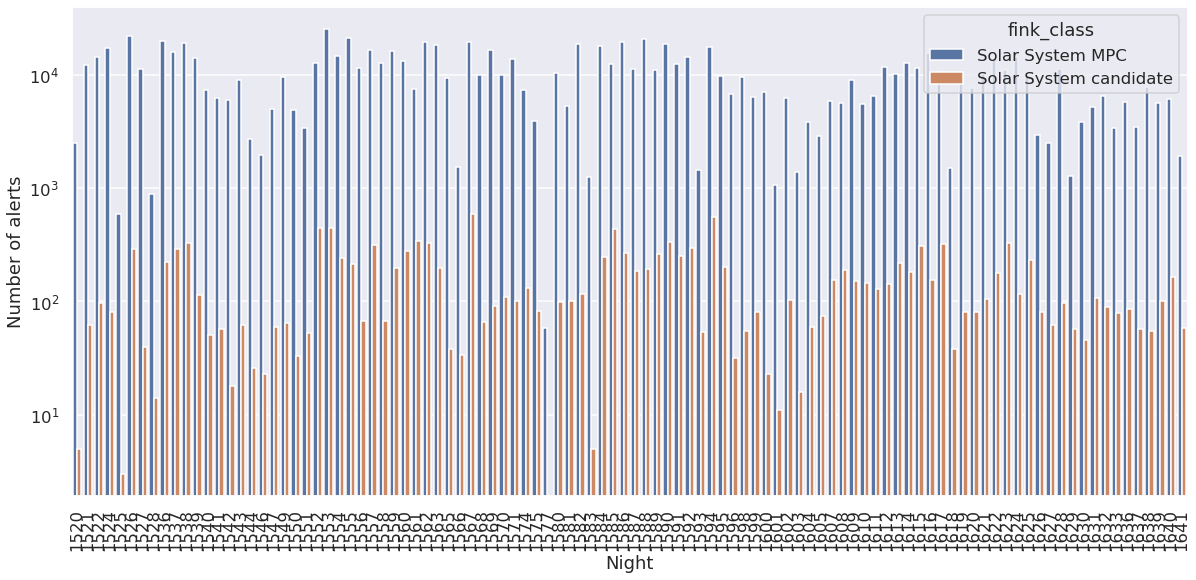

In [16]:
g = sns.barplot(x="nid", y="ra", hue="fink_class", data=data)

for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_yscale("log")
_ = g.set(xlabel="Night", ylabel="Number of alerts")

In [17]:
mpc_data["ra"].values

array([ 2482, 12203, 14462, 17230,   596, 22114, 11194,   880, 19979,
       15975, 19115, 13946,  7388,  6251,  5971,  9029,  2737,  1952,
        4959,  9601,  4885,  3388, 12762, 25213, 14740, 21139, 11423,
       16724, 12653, 16269, 13153,  7470, 19651, 18242,  9312,  1522,
       19471, 10007, 16594,  9986, 13819,  7303,  3924,    58, 10368,
        5293, 18779,  1243, 18057, 12368, 19543, 11155, 20507, 10933,
       18721, 12454, 14329,  1447, 17579,  9800,  6795,  9510,  6394,
        7090,  1075,  6293,  1387,  3826,  2893,  5861,  5682,  8912,
        5506,  6478, 11613, 10179, 12760, 11552, 15643, 10745,  1503,
        9861,  7708, 10205, 13933, 10957, 14240,  9768,  2971,  2514,
       11216,  1279,  3812,  5249,  6536,  3393,  5811,  3467,  7737,
        5654,  6084,  1933])

In [18]:
mpc_data[mpc_data["ra"] == 58]

,nid,fink_class,ra
43,1577,Solar System MPC,58


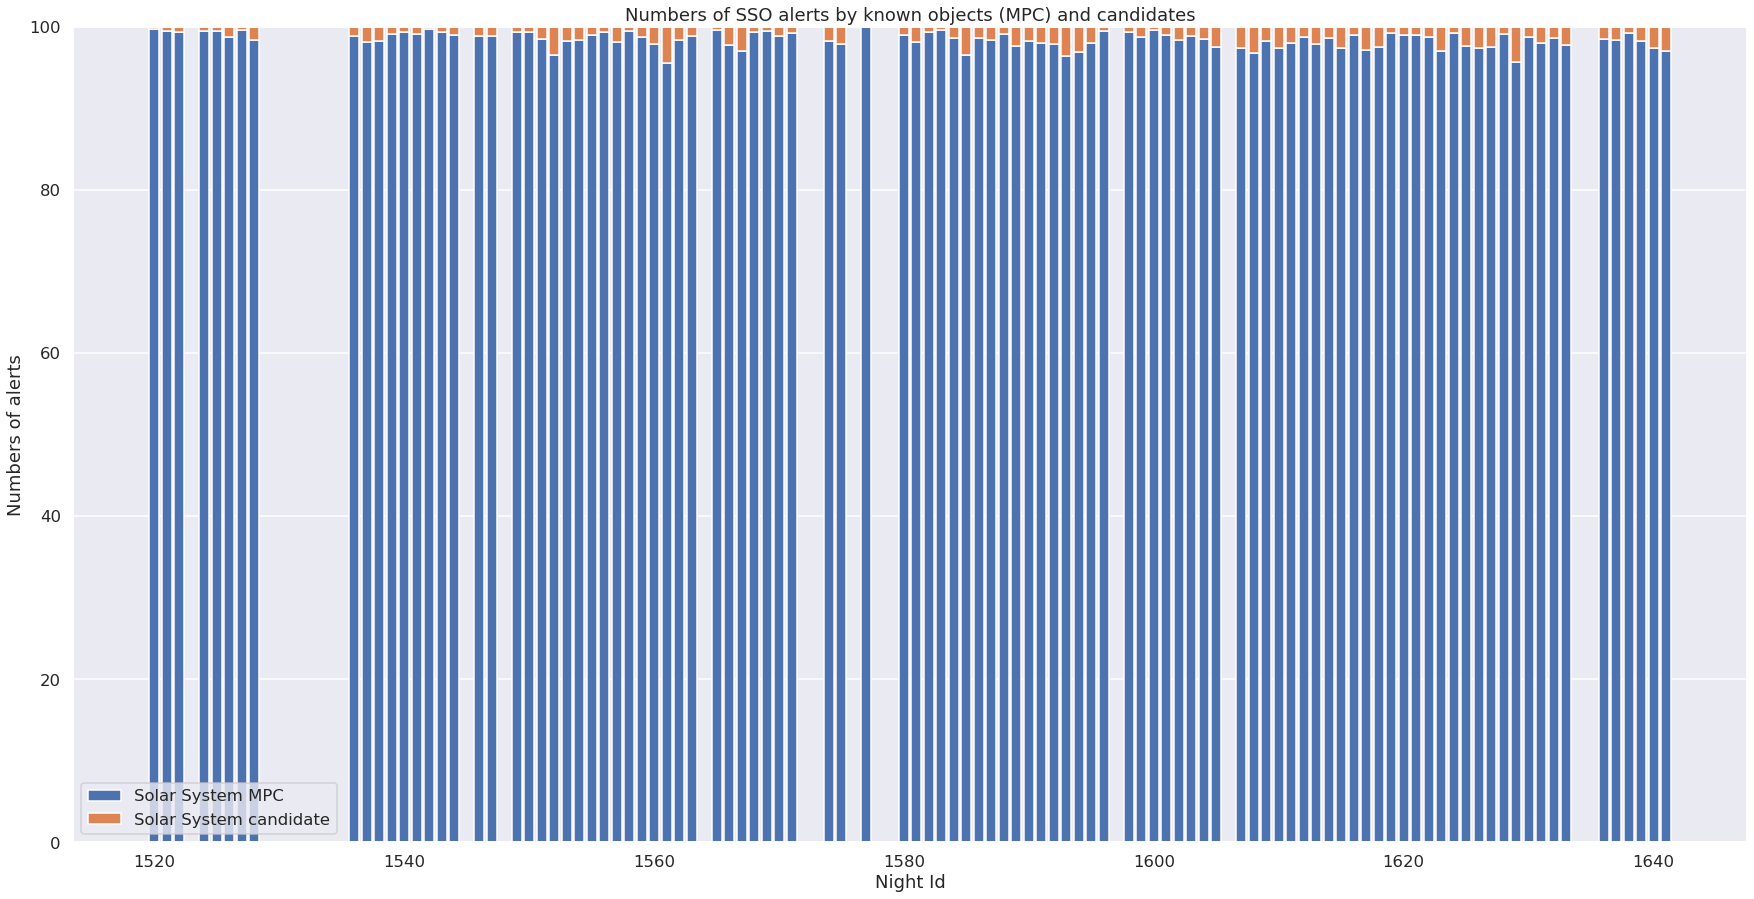

In [19]:
fig, ax = plt.subplots(figsize=(30, 15))

mpc_per = (mpc_data["ra"] / tot) * 100
sso_cand_per = (sso_cand_data["ra"] / tot) * 100

ax.bar(mpc_data["nid"], mpc_per, label='Solar System MPC')
ax.bar(sso_cand_data["nid"], sso_cand_per, bottom=mpc_per, label='Solar System candidate')

ax.set_ylabel('Numbers of alerts')
ax.set_xlabel('Night Id')
ax.set_title('Numbers of SSO alerts by known objects (MPC) and candidates')
ax.legend()

plt.show()

We can group the MPC object by name and aggregate some information by trajectories.

In [20]:
real_trajectory = df_sso[df_sso['fink_class'] == 'Solar System MPC']\
        .groupby(['ssnamenr'])\
            .agg(
                        ra=('ra',list), 
                        dec=('dec',list), 
                        dcmag=('dcmag',list), 
                        fid=('fid',list),
                        nid=('nid',list),
                        jd=('jd',list),
                        trajectory_size=('candid',lambda x: len(list(x)))
                    
                )

In [21]:
real_trajectory

,ra,dec,dcmag,fid,nid,jd,trajectory_size
ssnamenr,,,,,,,
10,"[129.1323467, 132.4495299]","[15.9005315, 15.0749481]","[14.153878825794962, 13.98938119637428]","[1, 1]","[1588, 1602]","[2459342.7151389, 2459356.6860301]",2
1000,"[27.1469394, 27.1475717, 27.1481783, 27.148892...","[27.4480188, 27.4483554, 27.4487186, 27.449058...","[17.101511217388342, 17.104897065456527, 17.08...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1611, 1611, 1611, 1611, 1612, 1612, 1612, 161...","[2459365.9739468, 2459365.9763426, 2459365.978...",27
10000,"[255.895801, 255.0838728, 255.0773091, 253.336...","[5.881157, 6.763548, 6.7694943, 8.0568378, 9.1...","[19.475869931605313, 20.064950713064665, 19.28...","[2, 1, 2, 1, 2, 1, 2, 2, 1, 1]","[1582, 1588, 1588, 1598, 1609, 1611, 1611, 162...","[2459336.8927546, 2459342.8767477, 2459342.918...",10
100000,"[263.3867371, 264.0340794, 264.0342949, 263.78...","[1.4940477, 3.7684234, 3.7694638, 8.1947867, 1...","[19.62594599674202, 19.589552226093762, 19.622...","[2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2]","[1562, 1570, 1570, 1585, 1599, 1611, 1613, 161...","[2459316.9818403, 2459324.9002778, 2459324.904...",12
100005,"[150.3702372, 148.8700222, 146.7366321, 144.80...","[4.3000449, 4.7405122, 5.4534963, 6.3155281]","[19.23239848776761, 19.249867531534143, 19.430...","[2, 2, 2, 2]","[1521, 1527, 1537, 1553]","[2459275.8187616, 2459281.746794, 2459291.7341...",4
...,...,...,...,...,...,...,...
99989,"[286.0830736, 285.1154036, 283.935025, 283.194...","[-13.4270293, -12.982869, -12.5981284, -12.409...","[16.422769285244286, 18.90033770270755, 19.127...","[2, 2, 1, 1]","[1614, 1621, 1628, 1632]","[2459368.9184259, 2459375.8980787, 2459382.878...",4
99991,"[195.6191785, 194.9040428, 193.4978867, 192.76...","[-10.2035076, -9.9441173, -9.4015042, -9.10490...","[18.690710697594312, 18.10974163080597, 18.913...","[1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2]","[1550, 1553, 1559, 1562, 1567, 1569, 1571, 157...","[2459304.7703935, 2459307.8366088, 2459313.752...",12
99995,"[161.7230956, 161.7042602, 158.9040396, 158.48...","[2.9952629, 2.9988307, 3.5921916, 3.6863232, 4...","[19.055907284746624, 19.431960112367438, 19.28...","[2, 1, 2, 2, 1, 2]","[1526, 1526, 1538, 1540, 1553, 1584]","[2459280.7869676, 2459280.8584259, 2459292.753...",6


We can get then one trajectory and plot his sky trajectory in terms of ra and dec and also plot his magnitude evolution

In [22]:
mpc_trajectory = real_trajectory[real_trajectory['trajectory_size'] > 1].sort_values(['trajectory_size'], ascending=False).reset_index()
mpc_trajectory

,ssnamenr,ra,dec,dcmag,fid,nid,jd,trajectory_size
0,1951,"[216.9545533, 218.0165354, 219.0169028, 219.08...","[55.4971483, 56.9767415, 58.3546605, 58.452669...","[15.180907911927733, 15.124579374273916, 16.17...","[2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, ...","[1520, 1522, 1524, 1524, 1527, 1536, 1536, 153...","[2459274.934456, 2459276.9081944, 2459278.8294...",86
1,53317,"[196.8659234, 196.7152213, 196.4730042, 192.67...","[56.0866378, 56.2220868, 56.4178826, 57.887489...","[16.929014310829764, 17.208366361167876, 16.83...","[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, ...","[1520, 1521, 1522, 1536, 1536, 1538, 1541, 154...","[2459274.9054398, 2459275.7023611, 2459276.888...",84
2,7019,"[186.1766519, 185.6609425, 185.6401671, 185.08...","[19.096891, 19.5983566, 19.6160314, 20.0824944...","[16.194570346647293, 16.18130877240066, 15.718...","[2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, ...","[1521, 1524, 1524, 1527, 1537, 1537, 1539, 153...","[2459275.8837616, 2459278.8181134, 2459278.923...",82
3,1584,"[18.9326971, 18.9336873, 18.9347218, 18.935773...","[28.8384758, 28.8390451, 28.8395781, 28.840117...","[16.346376510354464, 16.406203228034187, 16.39...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1602, 1602, 1602, 1602, 1603, 1603, 1603, 160...","[2459356.9798727, 2459356.9822222, 2459356.984...",82
4,75539,"[170.4953886, 169.7151066, 169.6880301, 168.18...","[59.4883409, 59.3031794, 59.2966307, 58.780127...","[17.0905532571915, 17.09427192658038, 16.45380...","[1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, ...","[1520, 1522, 1522, 1526, 1526, 1536, 1536, 153...","[2459274.7167593, 2459276.7378935, 2459276.803...",81
...,...,...,...,...,...,...,...,...
84395,241065,"[204.9800888, 203.5045597]","[-1.9450489, -0.9446841]","[19.587736480639723, 20.41534775375981]","[2, 1]","[1553, 1562]","[2459307.9502315, 2459316.8471065]",2
84396,241055,"[213.5875791, 212.1232237]","[-11.4385191, -10.8640964]","[20.02774797417329, 18.285904331252176]","[2, 2]","[1562, 1570]","[2459316.8075347, 2459324.7702546]",2
84397,241042,"[245.9497381, 245.5183188]","[-17.1824969, -17.1331042]","[19.840213767086198, 19.261483813553173]","[1, 2]","[1614, 1616]","[2459368.8368056, 2459370.8536458]",2
84398,240943,"[171.9070052, 171.4413013]","[8.9548205, 9.1591715]","[19.93517751338254, 19.77736044723792]","[2, 2]","[1536, 1538]","[2459290.8410301, 2459292.8378356]",2


In [23]:
n = np.unique(df_sso["nid"])[:7]
print(n)


first_night = df_sso[df_sso["nid"].isin(n)]

traj_count = first_night[first_night["fink_class"] == "Solar System MPC"].groupby("ssnamenr").count()

[1520 1521 1522 1524 1525 1526 1527]


In [24]:
traj_count[traj_count["ra"] >= 3]

,ra,dec,jd,fid,nid,fink_class,objectId,candid,magpsf,sigmapsf,magnr,sigmagnr,magzpsci,isdiffpos,dcmag,dcmagerr
ssnamenr,,,,,,,,,,,,,,,,
10002,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
100040,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
100045,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
100046,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
10006,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
99942,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
99949,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


### MOPS and ZMODE Recovery Study

In [74]:
fink_mpc = df_sso[df_sso['fink_class'] == 'Solar System MPC']

n = np.unique(fink_mpc["nid"])[:7]
print(n)
first_night = fink_mpc[fink_mpc["nid"].isin(n)]

real_trajectory_2 = first_night.groupby(['ssnamenr'])\
            .agg(
                        ra=('ra',list), 
                        dec=('dec',list), 
                        dcmag=('dcmag',list), 
                        fid=('fid',list),
                        nid=('nid',list),
                        jd=('jd',list),
                        trajectory_size=('candid',lambda x: len(list(x)))
                )

mpc_trajectory_test = real_trajectory_2[real_trajectory_2['trajectory_size'] > 1].sort_values(['trajectory_size'], ascending=False).reset_index()

[1520 1521 1522 1524 1525 1526 1527]


In [81]:
tot_orbfit_comput = len(mpc_trajectory_test[mpc_trajectory_test["trajectory_size"] >= 5])

print("detected by the Fink moving object processing system: {}".format(2269 / tot_orbfit_comput * 100))

detected by the Fink moving object processing system: 85.84941354521376


#### MOPS

In [82]:
mops_min_obs = mpc_trajectory_test[mpc_trajectory_test["trajectory_size"] >= 5]

diff_tot = (tot_orbfit_comput - len(mops_min_obs)) / tot_orbfit_comput * 100

def mops_detection(x):
    nid = x["nid"]

    diff_n = np.diff(nid)

    for i in range(len(diff_n) - 1):
        if diff_n[i] == 0:
            for j in range(i+1, len(diff_n)):
                if diff_n[j] == 0:
                    s = np.sum(diff_n[i:j])
                    if s <= 14:
                        return True
    return False

mask_track = mops_min_obs.apply(mops_detection, axis=1)
detected_by_mops = mops_min_obs[mask_track]
not_detected_by_mops = mops_min_obs[~mask_track]

mops_detected_percent = len(detected_by_mops) / tot_orbfit_comput * 100

not_detected_percent = len(not_detected_by_mops) / tot_orbfit_comput * 100 # + diff_tot

print("detected by mops: {}".format(mops_detected_percent))
print("not detected by mops: {}".format(not_detected_percent))
print("not seen by mops: {}".format(diff_tot))

print(mops_detected_percent + not_detected_percent + diff_tot)

detected by mops: 96.7082860385925
not detected by mops: 3.2917139614074915
not seen by mops: 0.0
100.0


#### ZMODE

In [83]:
zmode_min_obs = mpc_trajectory_test[mpc_trajectory_test["trajectory_size"] >= 6]

zmode_diff_tot = ((tot_orbfit_comput - len(zmode_min_obs)) / tot_orbfit_comput) * 100

def zmode_detection(x):
    nid = x["nid"]

    diff_nid = np.diff(nid)

    night_sep = []

    for i in range(len(diff_nid) - 2):
        if diff_nid[i] == 0 and diff_nid[i+1] <= 3:
            for j in range(i+2, len(diff_nid) - 1):
                if diff_nid[j] == 0 and diff_nid[j + 1] <= 3:
                    s = np.sum(diff_nid[i+1:j])
                    if s <= 14:
                        return True

    return False


mask_track = zmode_min_obs.apply(zmode_detection, axis=1)
detected_by_zmode = zmode_min_obs[mask_track]
not_detected_by_zmode = zmode_min_obs[~mask_track]

zmode_detected_percent = len(detected_by_zmode) / tot_orbfit_comput * 100

zmode_not_detected_percent = len(not_detected_by_zmode) / tot_orbfit_comput * 100 # zmode_diff_tot

print("detected by zmode: {}".format(zmode_detected_percent))
print("not detected by zmode: {}".format(zmode_not_detected_percent))
print("not seen by zmode: {}".format(zmode_diff_tot))

print(zmode_detected_percent + zmode_not_detected_percent + zmode_diff_tot)

detected by zmode: 30.45781309118426
not detected by zmode: 11.539916761256148
not seen by zmode: 58.002270147559585
100.0


In [30]:
#check if an asteroid can be seen twice in the same observations

unique_jd_per_traj = mpc_trajectory.apply(lambda x : np.unique(np.unique(x[6], return_counts=True)[1]), axis=1)

In [31]:
for el in unique_jd_per_traj.values:
    if len(el) > 1:
        print(el)

# it is impossible that an asteroid is seen twice in the same observation.

In [32]:
mpc_object_id = '1951'

specific_mpc = mpc_trajectory[mpc_trajectory['ssnamenr'] == mpc_object_id]
specific_mpc

,ssnamenr,ra,dec,dcmag,fid,nid,jd,trajectory_size
0,1951,"[216.9545533, 218.0165354, 219.0169028, 219.08...","[55.4971483, 56.9767415, 58.3546605, 58.452669...","[15.180907911927733, 15.124579374273916, 16.17...","[2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, ...","[1520, 1522, 1524, 1524, 1527, 1536, 1536, 153...","[2459274.934456, 2459276.9081944, 2459278.8294...",86


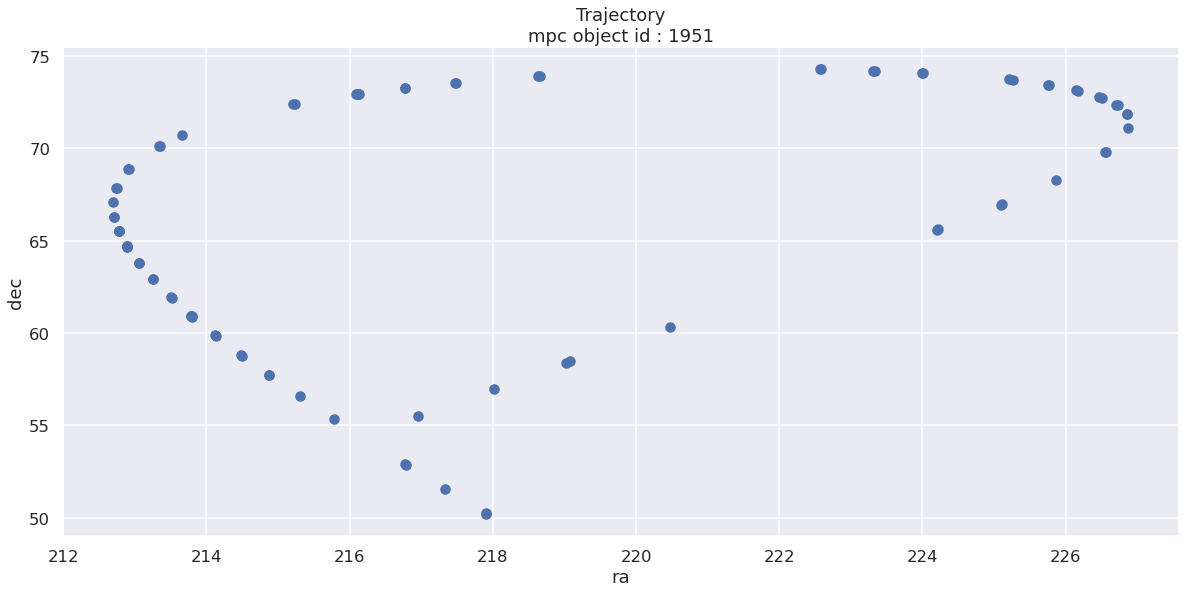

In [33]:
plt.scatter(specific_mpc['ra'].iloc[0], specific_mpc['dec'].iloc[0])
plt.title("Trajectory\nmpc object id : {}".format(mpc_object_id))
plt.xlabel("ra")
plt.ylabel("dec")
plt.show()

In [34]:
coord = SkyCoord(specific_mpc['ra'].iloc[0], specific_mpc['dec'].iloc[0], unit=u.degree)
ecliptic = coord.barycentricmeanecliptic

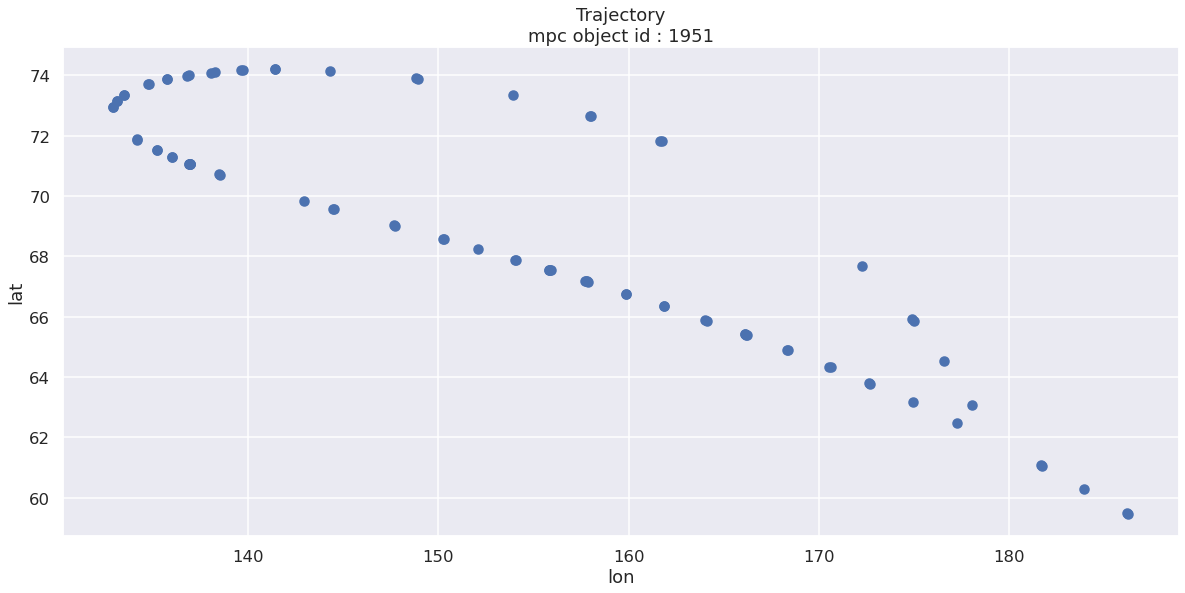

In [35]:
plt.scatter(ecliptic.lon, ecliptic.lat)
plt.title("Trajectory\nmpc object id : {}".format(mpc_object_id))
plt.xlabel("lon")
plt.ylabel("lat")
plt.show()

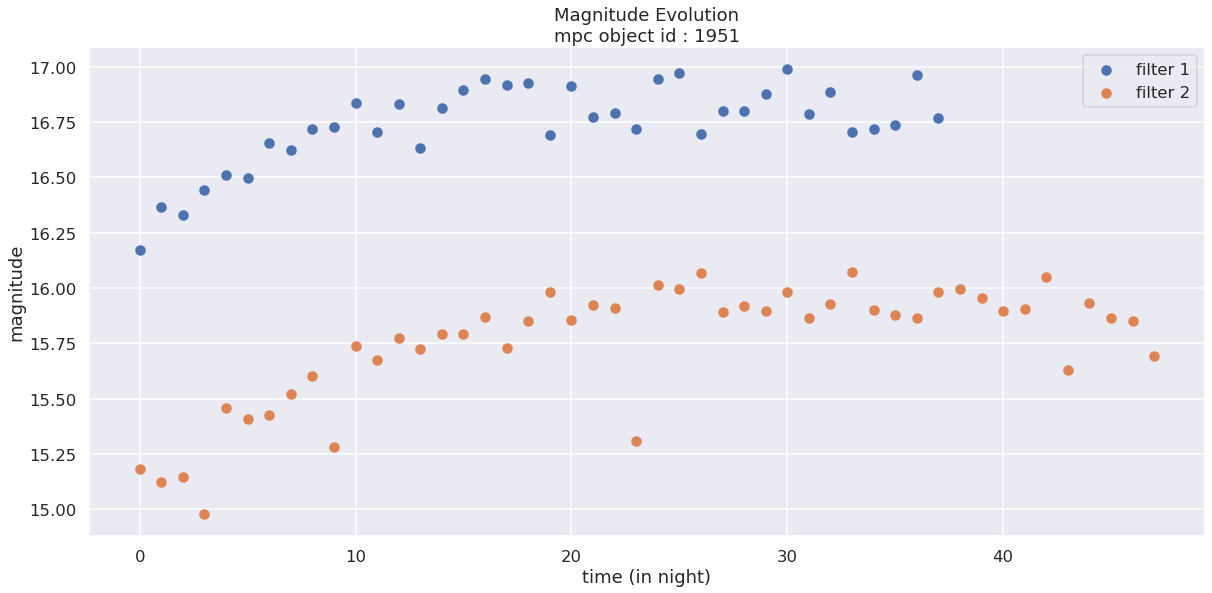

In [36]:
fid1_idx = np.where(np.array(specific_mpc['fid'].iloc[0]) == 1)
fid2_idx = np.where(np.array(specific_mpc['fid'].iloc[0]) == 2)

mag_fid1 = np.array(specific_mpc['dcmag'].iloc[0])[fid1_idx]
mag_fid2 = np.array(specific_mpc['dcmag'].iloc[0])[fid2_idx]

plt.scatter(np.arange(len(mag_fid1)), mag_fid1, label='filter 1')
plt.scatter(np.arange(len(mag_fid2)), mag_fid2, label='filter 2')
plt.legend()
plt.title("Magnitude Evolution\nmpc object id : {}".format(mpc_object_id))
plt.xlabel("time (in night)")
plt.ylabel("magnitude")
plt.show()

In [37]:
large_traj = mpc_trajectory[mpc_trajectory['trajectory_size'] > 77]

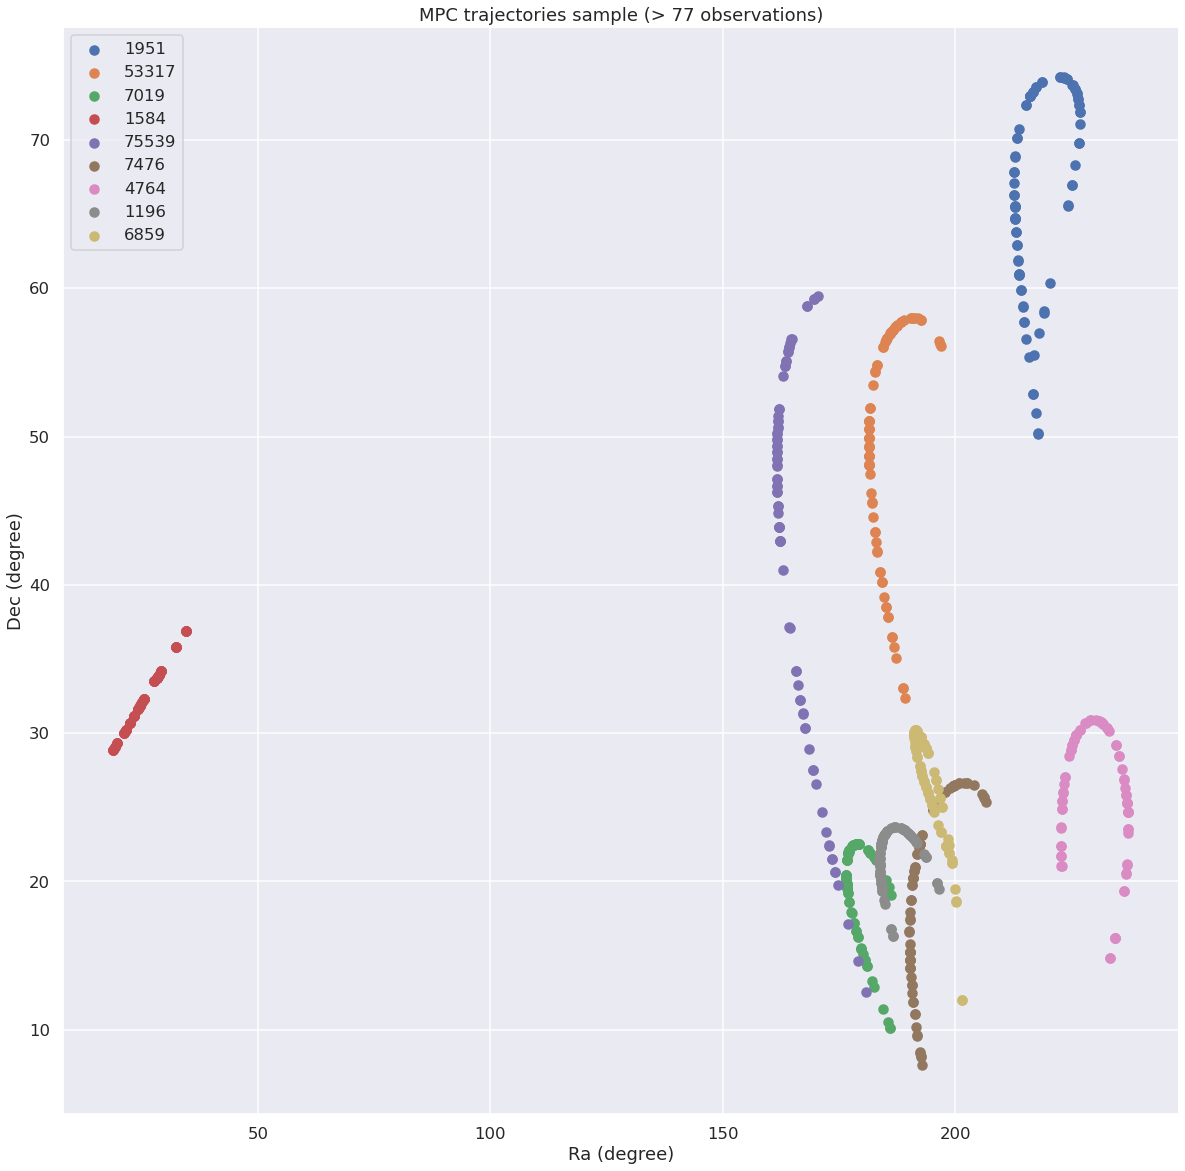

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

for _, rows in large_traj.iterrows():
    ra = rows['ra']
    dec = rows['dec']
    label = rows['ssnamenr']

    ax.scatter(ra, dec, label=label)

plt.legend()

plt.title("MPC trajectories sample (> 77 observations)")
plt.xlabel("Ra (degree)")
plt.ylabel("Dec (degree)")
plt.show()

['#4B56BD', '#BEBA7C', '#8B3C25', '#0E6352', '#14176C', '#021104', '#253B60', '#C2BED3', '#B2853C']


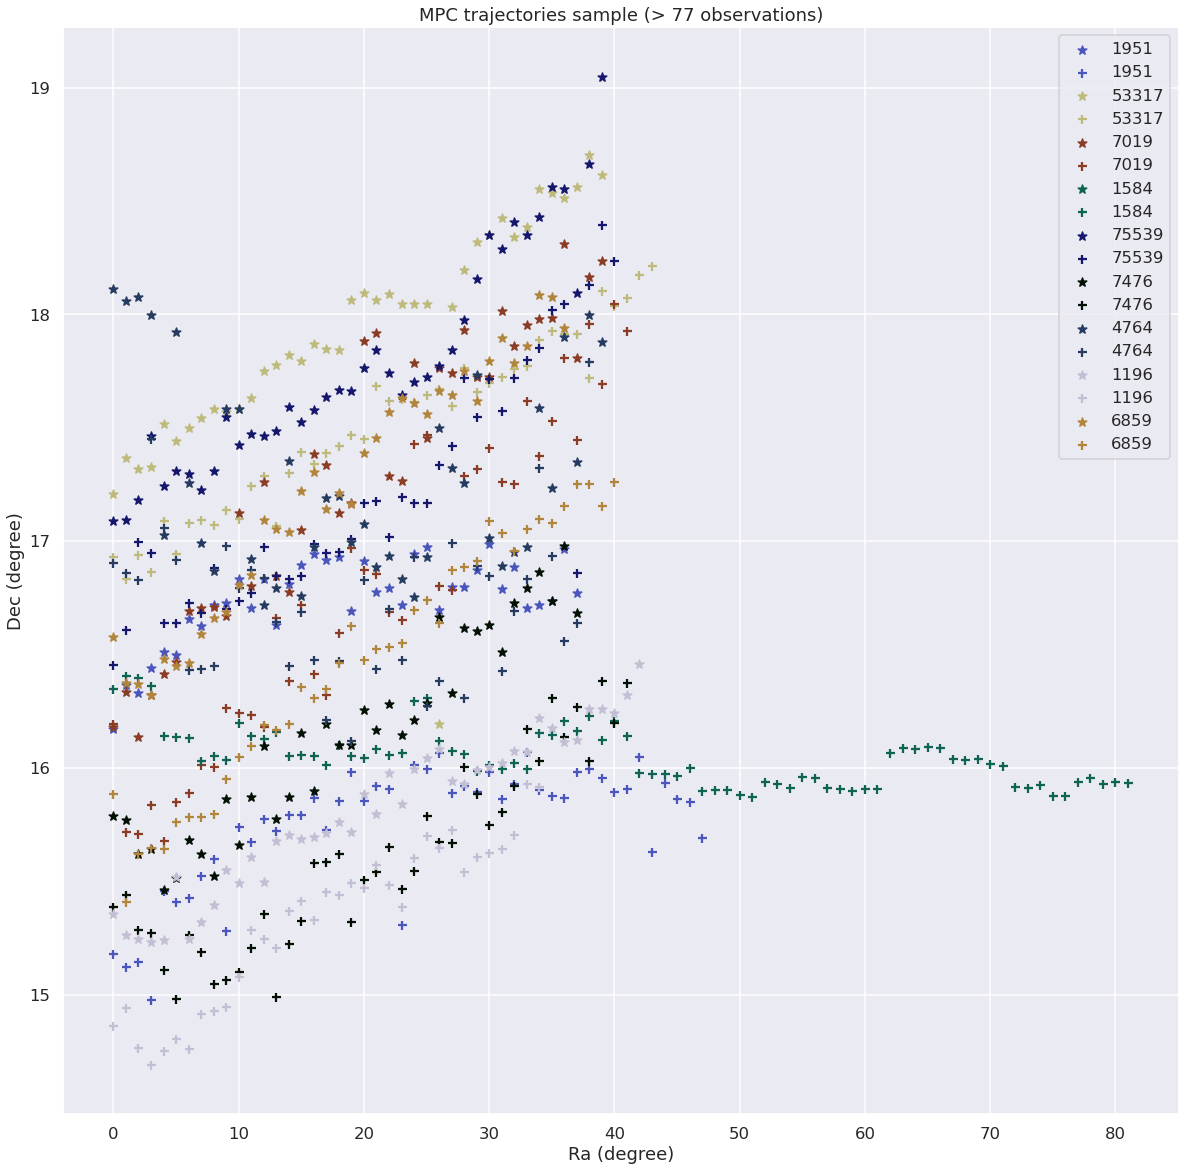

In [39]:
import random

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

number_of_colors = len(large_traj)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

for (_, rows), c in zip(large_traj.iterrows(), color):
    fid = rows["fid"]
    fid_1 = np.where(np.array(fid) == 1)[0]
    fid_2 = np.where(np.array(fid) == 2)[0]

    mag_1 = np.array(rows['dcmag'])[fid_1]
    mag_2 = np.array(rows['dcmag'])[fid_2]

    label = rows['ssnamenr']

    ax.scatter(np.arange(len(mag_1)), mag_1, label=label, marker="*", c=c)
    ax.scatter(np.arange(len(mag_2)), mag_2, label=label, marker="+", c=c)


plt.legend()

plt.title("MPC trajectories sample (> 77 observations)")
plt.xlabel("Ra (degree)")
plt.ylabel("Dec (degree)")
plt.show()

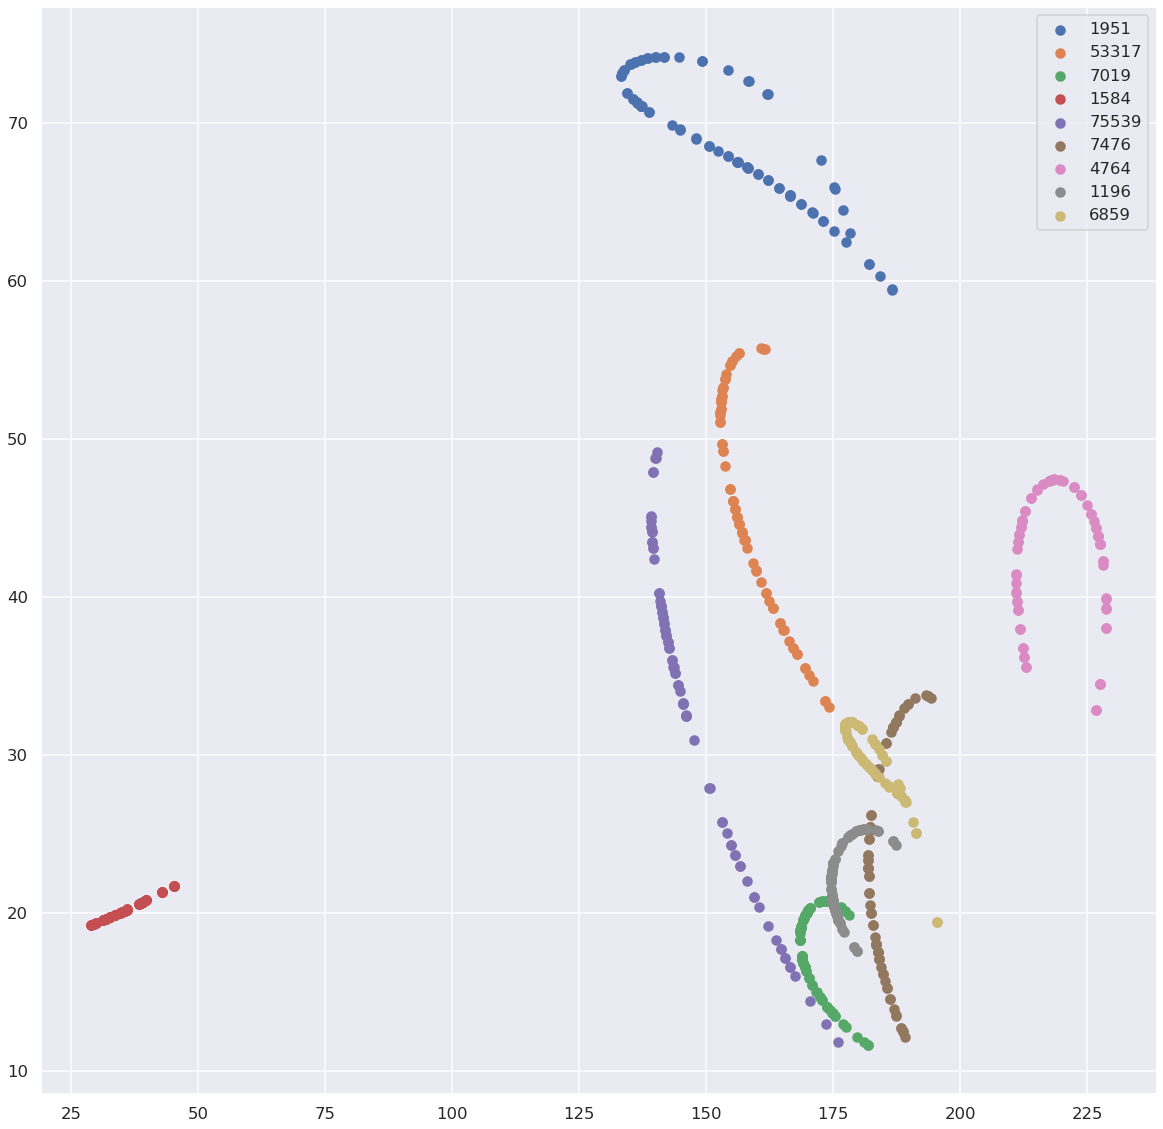

In [40]:
from astropy.time import Time
from astropy.coordinates import BarycentricMeanEcliptic
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

for _, rows in large_traj.iterrows():
    jd_time = Time(rows['jd'], format='jd')
    baryeclip = BarycentricMeanEcliptic(equinox=jd_time)
    coord = SkyCoord(rows['ra'], rows['dec'], unit=u.degree)
    ecliptic = coord.transform_to(baryeclip)
    label = rows['ssnamenr']

    ax.scatter(ecliptic.lon, ecliptic.lat, label=label)

plt.legend()
plt.show()

#### Proportion of trajectories without tracklets

In [46]:
mpc_trajectory

,ssnamenr,ra,dec,dcmag,fid,nid,jd,trajectory_size
0,1951,"[216.9545533, 218.0165354, 219.0169028, 219.08...","[55.4971483, 56.9767415, 58.3546605, 58.452669...","[15.180907911927733, 15.124579374273916, 16.17...","[2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, ...","[1520, 1522, 1524, 1524, 1527, 1536, 1536, 153...","[2459274.934456, 2459276.9081944, 2459278.8294...",86
1,53317,"[196.8659234, 196.7152213, 196.4730042, 192.67...","[56.0866378, 56.2220868, 56.4178826, 57.887489...","[16.929014310829764, 17.208366361167876, 16.83...","[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, ...","[1520, 1521, 1522, 1536, 1536, 1538, 1541, 154...","[2459274.9054398, 2459275.7023611, 2459276.888...",84
2,7019,"[186.1766519, 185.6609425, 185.6401671, 185.08...","[19.096891, 19.5983566, 19.6160314, 20.0824944...","[16.194570346647293, 16.18130877240066, 15.718...","[2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, ...","[1521, 1524, 1524, 1527, 1537, 1537, 1539, 153...","[2459275.8837616, 2459278.8181134, 2459278.923...",82
3,1584,"[18.9326971, 18.9336873, 18.9347218, 18.935773...","[28.8384758, 28.8390451, 28.8395781, 28.840117...","[16.346376510354464, 16.406203228034187, 16.39...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1602, 1602, 1602, 1602, 1603, 1603, 1603, 160...","[2459356.9798727, 2459356.9822222, 2459356.984...",82
4,75539,"[170.4953886, 169.7151066, 169.6880301, 168.18...","[59.4883409, 59.3031794, 59.2966307, 58.780127...","[17.0905532571915, 17.09427192658038, 16.45380...","[1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, ...","[1520, 1522, 1522, 1526, 1526, 1536, 1536, 153...","[2459274.7167593, 2459276.7378935, 2459276.803...",81
...,...,...,...,...,...,...,...,...
84395,241065,"[204.9800888, 203.5045597]","[-1.9450489, -0.9446841]","[19.587736480639723, 20.41534775375981]","[2, 1]","[1553, 1562]","[2459307.9502315, 2459316.8471065]",2
84396,241055,"[213.5875791, 212.1232237]","[-11.4385191, -10.8640964]","[20.02774797417329, 18.285904331252176]","[2, 2]","[1562, 1570]","[2459316.8075347, 2459324.7702546]",2
84397,241042,"[245.9497381, 245.5183188]","[-17.1824969, -17.1331042]","[19.840213767086198, 19.261483813553173]","[1, 2]","[1614, 1616]","[2459368.8368056, 2459370.8536458]",2
84398,240943,"[171.9070052, 171.4413013]","[8.9548205, 9.1591715]","[19.93517751338254, 19.77736044723792]","[2, 2]","[1536, 1538]","[2459290.8410301, 2459292.8378356]",2


In [52]:
traj_without_track = mpc_trajectory[~mpc_trajectory.apply(lambda x: np.any(np.diff(x["nid"]) == 0), axis=1)]

In [53]:
len(traj_without_track) / len(mpc_trajectory) * 100

41.06990521327014

In [30]:
def plot_hist_and_cdf(data, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf = [0.8, 0.9], bins=200):

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

    ax1.set_title(hist_title)
    ax1.set_xlabel(hist_xlabel)
    ax1.set_ylabel(hist_ylabel)
    ax1.set_yscale('log')
    ax1.hist(data, bins=bins, range=hist_range)

    ax2.set_title(cdf_title)
    ax2.set_ylabel(cdf_ylabel)
    ax2.set_xlabel(cdf_xlabel)

    mean_diff_value, mean_diff_bins, _ = ax2.hist(data, range=cdf_range, bins=bins, cumulative=True, density=True, histtype='step')

    x_interp = np.interp(percent_cdf, mean_diff_value, mean_diff_bins[:-1])
    ax2.scatter(x_interp, percent_cdf)

    for i , value in enumerate(zip(percent_cdf, x_interp)):
        txt = str(value[0]) + ", " + str(value[1].round(decimals=2))
        ax2.annotate(txt, (x_interp[i], percent_cdf[i]))

    plt.show()

In [77]:
tt = traj_without_track[traj_without_track["trajectory_size"] > 4]


tt2 = tt.explode(["diff_nid"])
print(len(tt2[tt2["diff_nid"] <= 2]) / len(tt2) * 100)

26.089067313976287


/tmp/ipykernel_3397/57439261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_without_track["diff_nid"] = traj_without_track.apply(lambda x: np.diff(x["nid"]), axis=1)


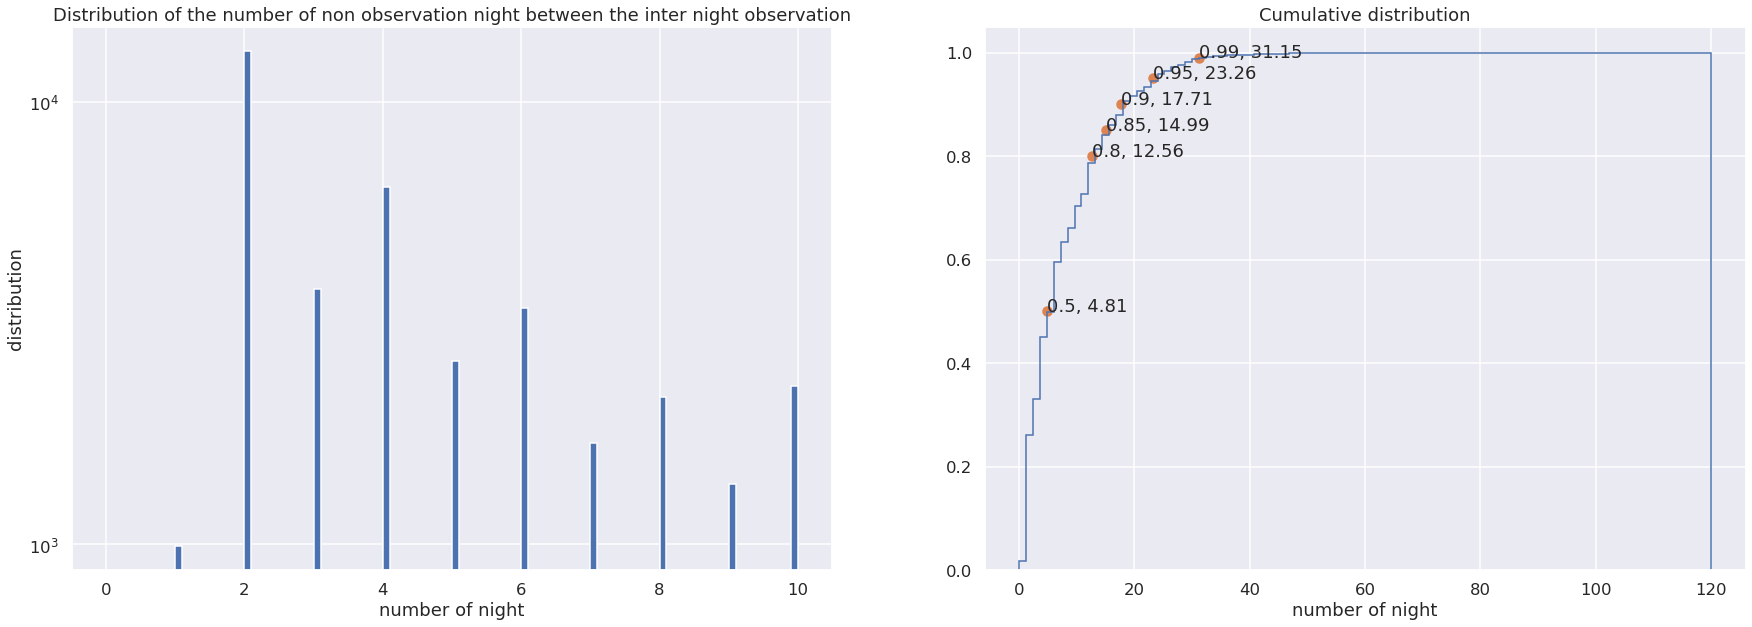

In [72]:
traj_without_track["diff_nid"] = traj_without_track.apply(lambda x: np.diff(x["nid"]), axis=1)

plot_hist_and_cdf(tt.explode(['diff_nid'])['diff_nid'].astype(np.float32), (0, 10),
    'Distribution of the number of non observation night between the inter night observation',
    'number of night', 'distribution', (0, 120),
    'Cumulative distribution',
    'number of night', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

Becareful, some MPC object can be seen twice in the same exposition, so, they have the same jd and their difference are 0, take their candid and investigate this objects in terms of velocity and orbit type. 

-> Issue resolved : there was duplicates alerts in the original dataset so diff(jd) could be at 0. 

In [31]:
def sep_df(x):
    ra, dec, jd = x["ra"], x["dec"], x["jd"]

    c1 = SkyCoord(ra, dec, unit = u.degree)

    diff_jd = np.diff(jd)

    sep = c1[0:-1].separation(c1[1:]).degree
    
    velocity = sep / diff_jd

    return velocity


def pos_angle_df(x):
    ra, dec, jd = x[1], x[2], x[6]

    c1 = SkyCoord(ra, dec, unit = u.degree)

    diff_jd = np.diff(jd)

    sep = c1[0:-1].position_angle(c1[1:]).degree 
    
    velocity = sep / diff_jd

    return velocity


def mag_df(x):

    mag, fid, jd = np.array(x[3]), np.array(x[4]), np.array(x[6])

    fid1 = np.where(fid == 1)[0]
    fid2 = np.where(fid == 2)[0]

    jd_fid1 = jd[fid1]
    jd_fid2 = jd[fid2]

    mag1 = mag[fid1]
    diff_mag1 = np.diff(mag1)

    mag2 = mag[fid2]
    diff_mag2 = np.diff(mag2)

    diff_jd1 = np.diff(jd_fid1)
    diff_jd2 = np.diff(jd_fid2)

    diff_mag1 = np.abs(diff_mag1)
    diff_mag2 = np.abs(diff_mag2)
    
    dmag_fid1 = np.divide(diff_mag1, diff_jd1)
    dmag_fid2 = np.divide(diff_mag2, diff_jd2)

    if len(dmag_fid1) == 0:
        return [], dmag_fid2, 0
    elif len(dmag_fid2) == 0:
        return dmag_fid1, [], 0
    else:
        diff_fid_mag = np.subtract(np.mean(mag1), np.mean(mag2))

        return dmag_fid1, dmag_fid2, diff_fid_mag

## Study of the dynamics of Solar System Object 

The plots below are the results of our study of the dynamics of solar system objects. We will use the differents values observed in the cumulative distributions to constraints the associations that can be made by the linkage algorithm. 

### Intra-night Separation and Magnitude Study

In [32]:
def intra_sep_df(x):
    ra, dec= x["ra"], x["dec"]

    c1 = SkyCoord(ra, dec, unit = u.degree)

    sep = c1[0:-1].separation(c1[1:]).arcsecond
    
    velocity = sep

    return velocity

def intra_mag_df(x):

    mag, fid, jd = np.array(x["mag"]), np.array(x["fid"]), np.array(x["jd"])

    fid1 = np.where(fid == 1)[0]
    fid2 = np.where(fid == 2)[0]

    mag1 = mag[fid1]
    diff_mag1 = np.diff(mag1)

    mag2 = mag[fid2]
    diff_mag2 = np.diff(mag2)

    diff_mag1 = np.abs(diff_mag1)
    diff_mag2 = np.abs(diff_mag2)
    

    if len(diff_mag1) == 0:
        return [], diff_mag2, 0
    elif len(diff_mag2) == 0:
        return diff_mag1, [], 0
    else:
        diff_fid_mag = np.subtract(np.mean(mag1), np.mean(mag2))

        return diff_mag1, diff_mag2, diff_fid_mag

In [33]:
intra_night_trajectory = df_sso[df_sso['fink_class'] == 'Solar System MPC']\
        .groupby(['nid', 'ssnamenr'])\
                .agg(
                        ra=('ra',list), 
                        dec=('dec',list), 
                        dcmag=('dcmag',list), 
                        fid=('fid',list),
                        jd=('jd',list),
                        trajectory_size=('candid',lambda x: len(list(x)))
                )

In [37]:
intra_night_association = intra_night_trajectory[intra_night_trajectory['trajectory_size'] > 1]

## Study of the association between the intra night tracklets over night

In [43]:
intra_night_association = intra_night_association.reset_index()

In [34]:
tracklets_db = intra_night_association.groupby(['ssnamenr'])\
    .agg(
            ra=('ra',list), 
            dec=('dec',list), 
            dcmag=('dcmag',list), 
            fid=('fid',list),
            jd=('jd',list),
            nid=('nid',list),
            trajectory_size=('trajectory_size',sum),
            nb_tracklets=('trajectory_size', len)
        )

In [35]:
tracklets_db = tracklets_db[tracklets_db['nb_tracklets'] > 1]

In [33]:
def diff_nid(x):
    all_nid = x['nid']

    return np.diff(all_nid)

def sep_track(x):
    ra = x['ra']
    dec = x['dec']
    jd = x['jd']
    
    if len(ra) % 2 != 0:
        ra = ra[:-1]
        dec = dec[:-1]
        jd = jd[:-1]

    post_ra, post_dec, post_jd = [i[-1] for i in ra[::2]], [i[-1] for i in dec[::2]], [i[-1] for i in jd[::2]]
    pre_ra, pre_dec, pre_jd = [i[0] for i in ra[1::2]], [i[0] for i in dec[1::2]], [i[0] for i in jd[1::2]]
    post_coord = SkyCoord(post_ra, post_dec, unit=u.degree)
    pre_coord = SkyCoord(pre_ra, pre_dec, unit=u.degree)
    diff_jd = np.subtract(pre_jd, post_jd)

    sep = post_coord.separation(pre_coord).arcminute / diff_jd
    return sep


def mag_same_fid_track(x):
    dcmag = x['dcmag']
    fid = x['fid']
    jd = x['jd']
    
    if len(dcmag) % 2 != 0:
        dcmag = dcmag[:-1]
        fid = fid[:-1]
        jd = jd[:-1]

    post_dcmag, post_fid, post_jd = [i[-1] for i in dcmag[::2]], [i[-1] for i in fid[::2]], [i[-1] for i in jd[::2]]
    pre_dcmag, pre_fid, pre_jd = [i[0] for i in dcmag[1::2]], [i[0] for i in fid[1::2]], [i[0] for i in jd[1::2]]
    
    test_fid = np.equal(post_fid, pre_fid)
    
    pre_dcmag = np.array(pre_dcmag)[test_fid]
    post_dcmag = np.array(post_dcmag)[test_fid]
    post_jd = np.array(post_jd)[test_fid]
    pre_jd = np.array(pre_jd)[test_fid]

    diff_jd = np.subtract(pre_jd, post_jd)

    diff_mag_same_fid = np.subtract(pre_dcmag, post_dcmag) / diff_jd
    return diff_mag_same_fid

def mag_diff_fid_track(x):
    dcmag = x['dcmag']
    fid = x['fid']
    jd = x['jd']
    
    if len(dcmag) % 2 != 0:
        dcmag = dcmag[:-1]
        fid = fid[:-1]
        jd = jd[:-1]

    post_dcmag, post_fid, post_jd = [i[-1] for i in dcmag[::2]], [i[-1] for i in fid[::2]], [i[-1] for i in jd[::2]]
    pre_dcmag, pre_fid, pre_jd = [i[0] for i in dcmag[1::2]], [i[0] for i in fid[1::2]], [i[0] for i in jd[1::2]]
    
    test_fid = np.logical_not(np.equal(post_fid, pre_fid))
    
    pre_dcmag = np.array(pre_dcmag)[test_fid]
    post_dcmag = np.array(post_dcmag)[test_fid]
    post_jd = np.array(post_jd)[test_fid]
    pre_jd = np.array(pre_jd)[test_fid]

    diff_jd = np.subtract(pre_jd, post_jd)

    diff_mag_same_fid = np.subtract(pre_dcmag, post_dcmag) / diff_jd
    return diff_mag_same_fid

def angle(a, b, c):
    ba = b - a
    ca = c - a

    cosine_angle = np.dot(ba, ca) / (np.linalg.norm(ba) * np.linalg.norm(ca))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

def track_angle(x):
    ra = x['ra']
    dec = x['dec']
    jd = x['jd']
    
    if len(ra) % 2 != 0:
        ra = ra[:-1]
        dec = dec[:-1]
        jd = jd[:-1]

    post_ra, post_dec, post_jd = [i[-2:] for i in ra[::2]], [i[-2:] for i in dec[::2]], [i[-2:] for i in jd[::2]]
    pre_ra, pre_dec, pre_jd = [i[0] for i in ra[1::2]], [i[0] for i in dec[1::2]], [i[0] for i in jd[1::2]]

    all_angle = []
    for i in range(len(post_ra)):
        a = np.array([post_ra[i][0], post_dec[i][0]])
        b = np.array([post_ra[i][1], post_dec[i][1]])
        c = np.array([pre_ra[i], pre_dec[i]])
        all_angle.append(angle(a, b, c) / (pre_jd[i] - post_jd[i][1]))

    return all_angle

In [37]:
tracklets_db['diff_nid'] = tracklets_db.apply(diff_nid, axis=1)

In [38]:
tracklets_db['sep'] = tracklets_db.apply(sep_track, axis=1)

In [ ]:
tracklets_db['diff_mag_same_fid'] = tracklets_db.apply(mag_same_fid_track, axis=1)
tracklets_db['diff_mag_diff_fid'] = tracklets_db.apply(mag_diff_fid_track, axis=1)

In [ ]:
tracklets_db['angle'] = tracklets_db.apply(track_angle, axis=1)

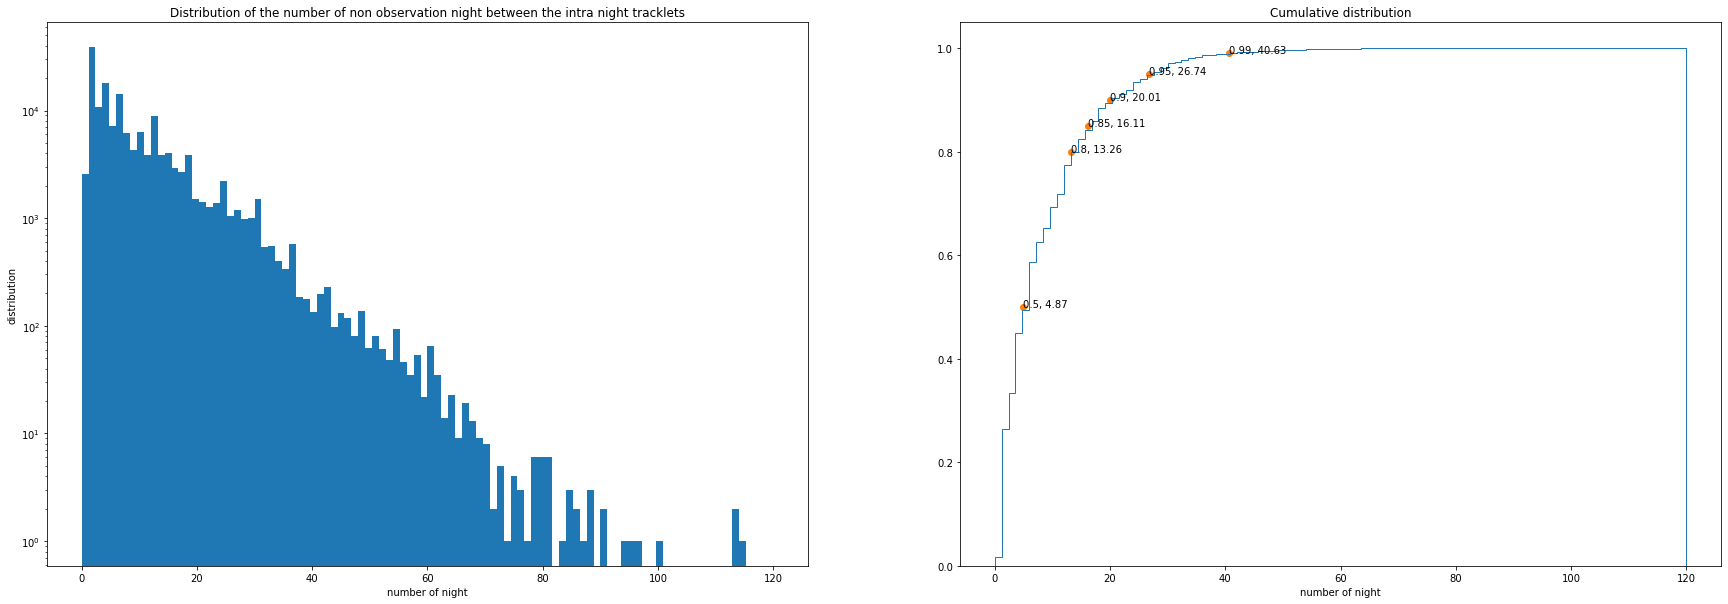

In [ ]:
plot_hist_and_cdf(tracklets_db.explode(['diff_nid'])['diff_nid'].astype(np.float32), (0, 120),
    'Distribution of the number of non observation night between the intra night tracklets',
    'number of night', 'distribution', (0, 120),
    'Cumulative distribution',
    'number of night', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

In [ ]:
sep = tracklets_db.explode(['sep'])['sep']

min(sep), max(sep), np.mean(sep), np.median(sep), np.quantile(sep, 0.99)

(0.0396019699087094,
 243.12817859908694,
 10.798633129030048,
 10.979749484164886,
 27.833339362465015)

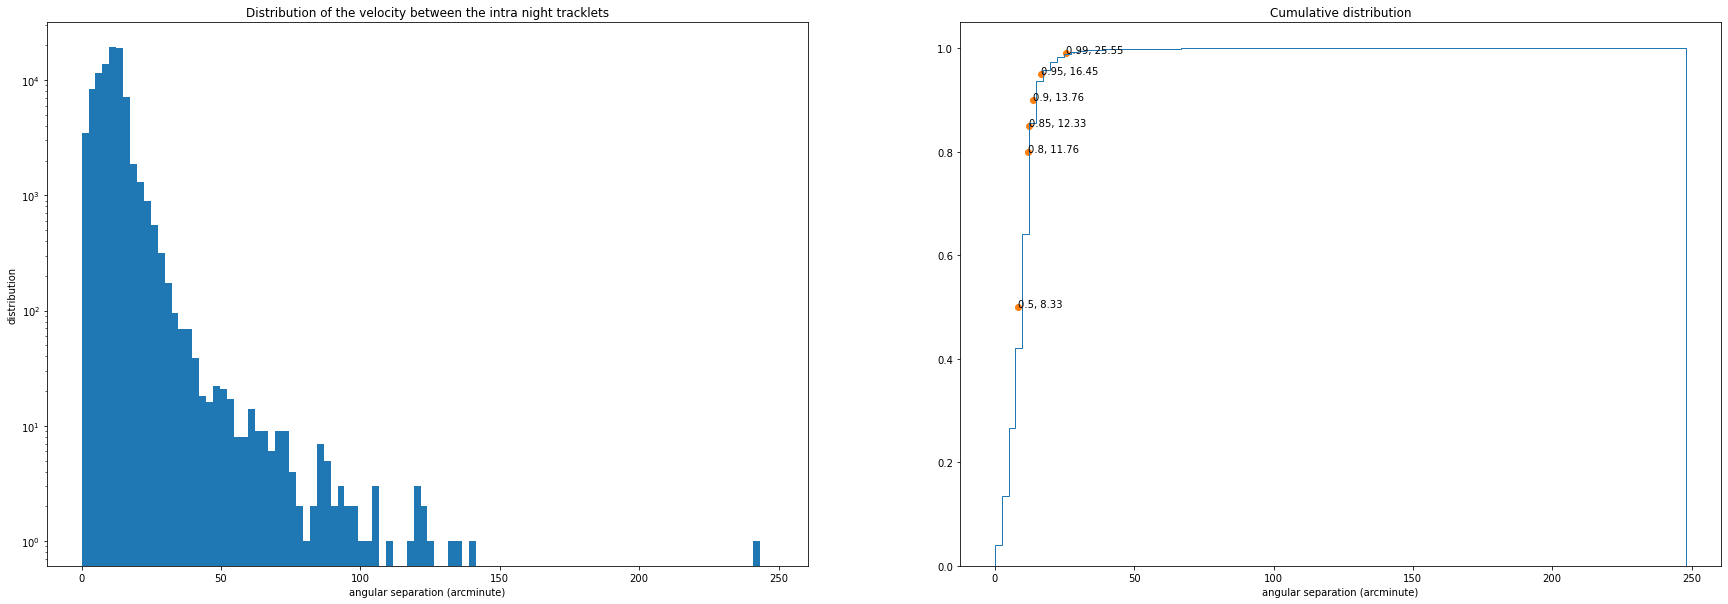

In [ ]:
plot_hist_and_cdf(tracklets_db.explode(['sep'])['sep'].astype(np.float32), (0, max(sep) + 5), 
    'Distribution of the velocity between the intra night tracklets', 
    'angular separation (arcminute/day)', 'distribution', (0, max(sep) + 5),
    'Cumulative distribution',
    'velocity (arcminute/day)', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

In [ ]:
mag_same = tracklets_db.explode(['diff_mag_same_fid'])['diff_mag_same_fid'].fillna(-1)
mag_diff = tracklets_db.explode(['diff_mag_diff_fid'])['diff_mag_diff_fid'].fillna(-1)


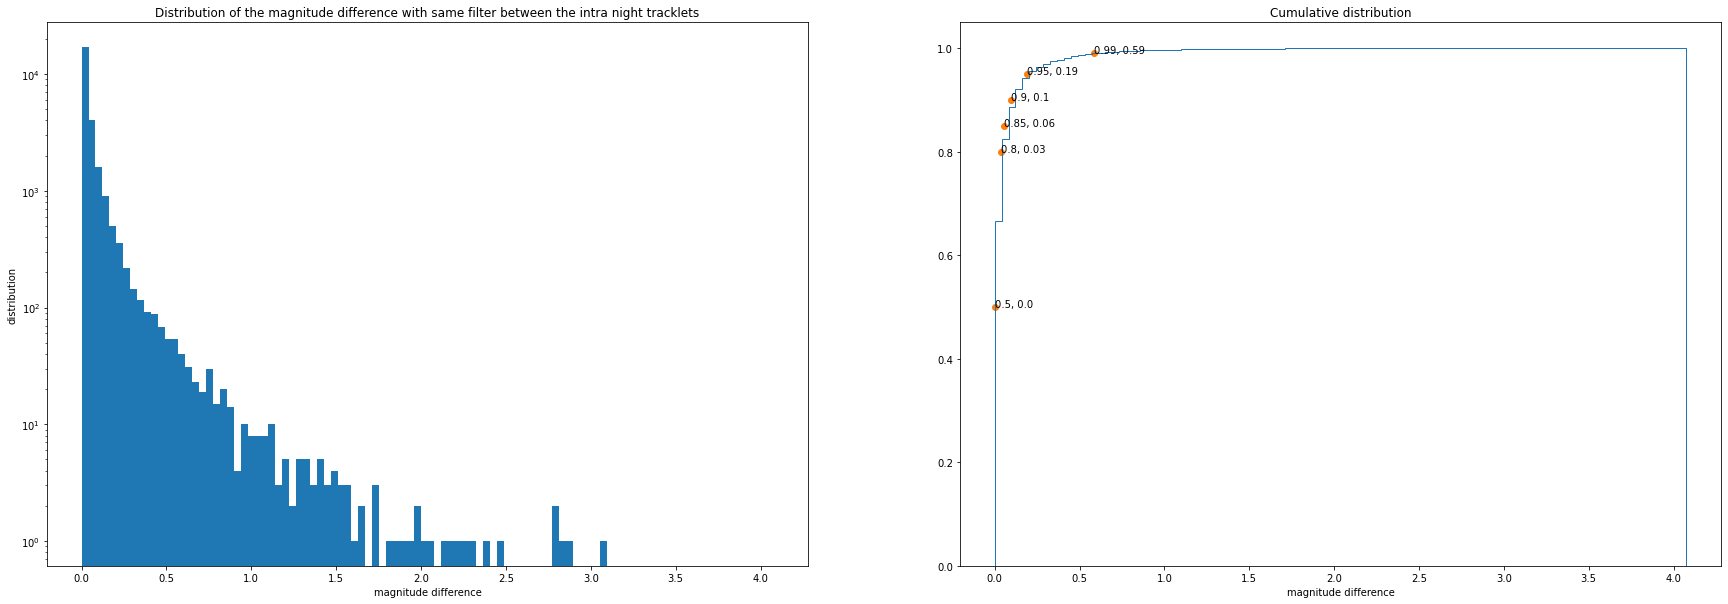

In [ ]:
plot_hist_and_cdf(mag_same, (0, max(mag_same) + 1), 
    'Distribution of the magnitude difference with same filter between the intra night tracklets', 
    'magnitude difference', 'distribution', (0, max(mag_same) + 1),
    'Cumulative distribution',
    'magnitude difference', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

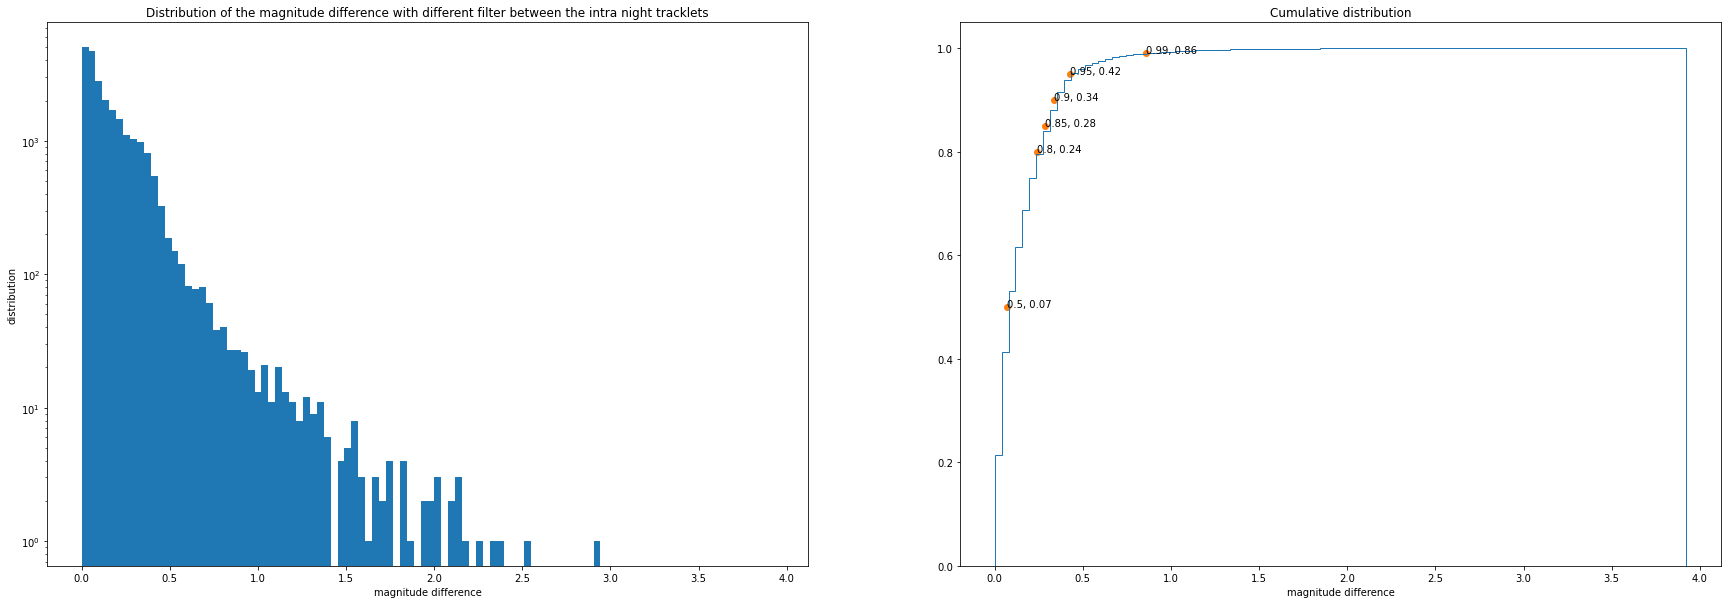

In [ ]:
plot_hist_and_cdf(mag_diff, (0, max(mag_diff) + 1), 
    'Distribution of the magnitude difference with different filter between the intra night tracklets', 
    'magnitude difference', 'distribution', (0, max(mag_diff) + 1),
    'Cumulative distribution',
    'magnitude difference', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

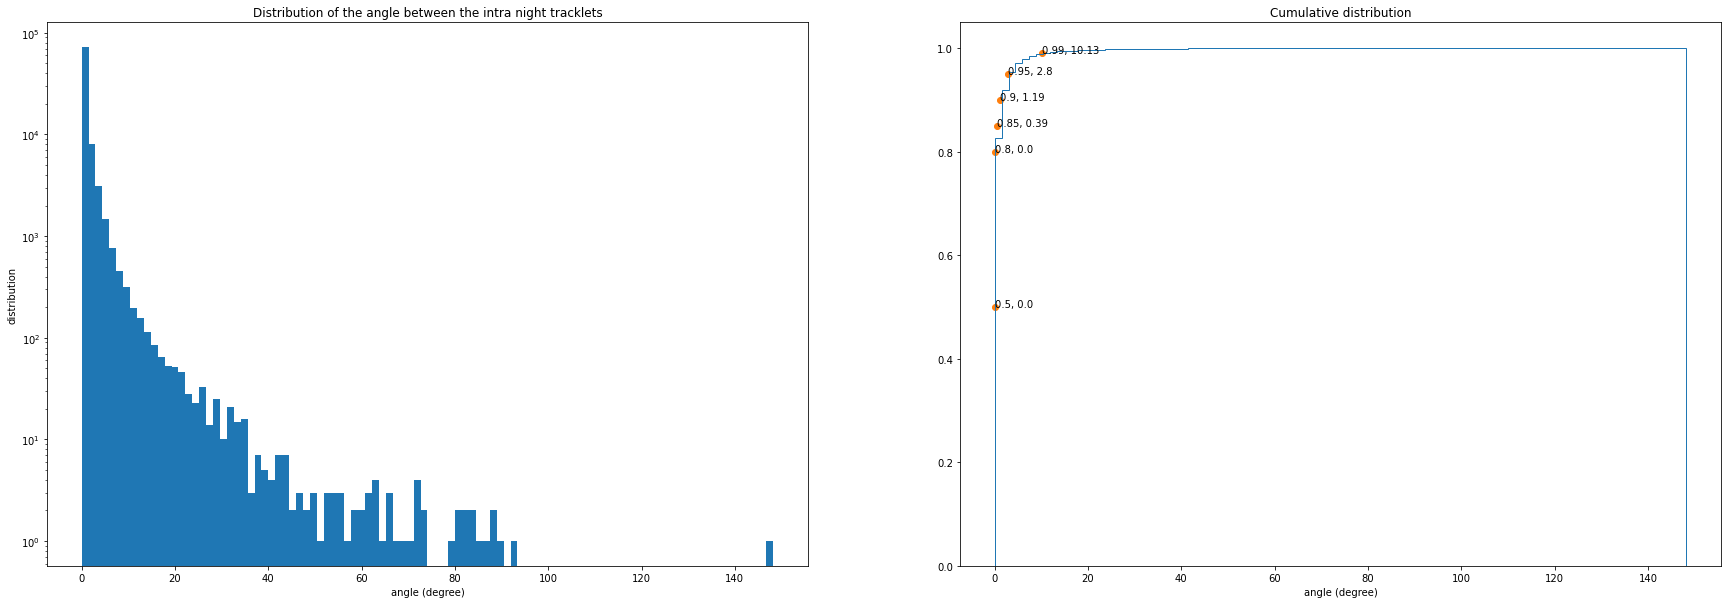

In [ ]:
angle_values = tracklets_db.explode(['angle'])['angle'].astype(np.float64)
plot_hist_and_cdf(angle_values, (0, max(angle_values) + 1), 
    'Distribution of the angle between the intra night tracklets', 
    'angle (degree)', 'distribution', (0, max(angle_values) + 1),
    'Cumulative distribution',
    'angle (degree)', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

### Study of the intra night tracklets

In [52]:
def diff_jd(x):

    return np.diff(x["jd"])

intra_night_association.apply(diff_jd, axis=1)

0                                     [0.08844900038093328]
1              [0.18677080003544688, 0.0004745996557176113]
2                                     [0.02869219984859228]
3                                     [0.08844900038093328]
4                                     [0.13315979996696115]
                                ...                        
206826                               [0.019155099987983704]
206827                               [0.002071700058877468]
206828    [0.0024305996485054493, 0.0024189003743231297,...
206829        [0.0024190000258386135, 0.004849599674344063]
206830                               [0.019155099987983704]
Length: 206831, dtype: object

In [38]:
intra_night_association['sep'] = intra_night_association.apply(intra_sep_df, axis=1)

/tmp/ipykernel_7508/4222217934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intra_night_association['sep'] = intra_night_association.apply(intra_sep_df, axis=1)


In [39]:
intra_night_association = intra_night_association.explode(['sep'])

In [40]:
np.max(intra_night_association['sep']), np.quantile(intra_night_association['sep'], 0.9992)

(894.2046443226644, 200.0760955211952)

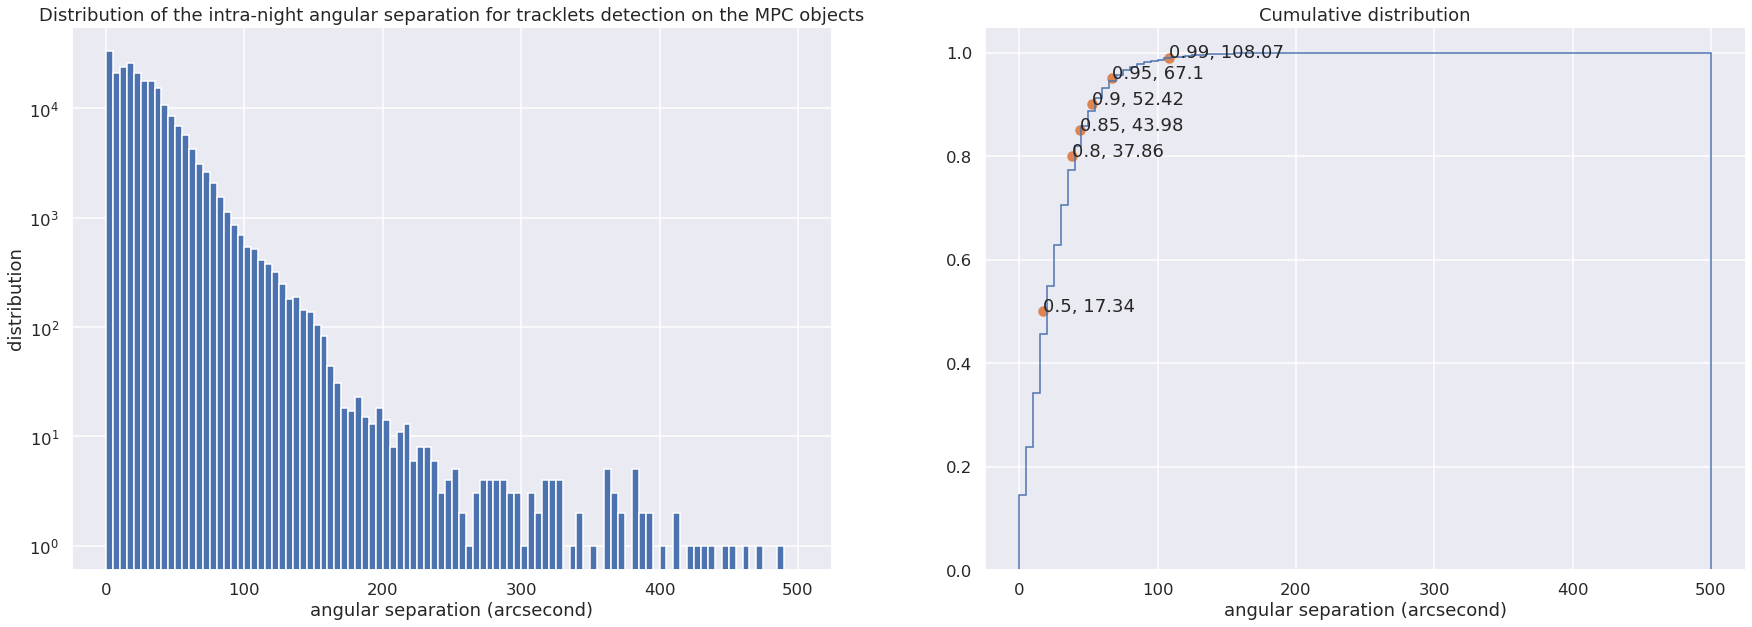

In [41]:
plot_hist_and_cdf(intra_night_association['sep'].astype(np.float32), (0, 500), 
    'Distribution of the intra-night angular separation for tracklets detection on the MPC objects', 
    'angular separation (arcsecond)', 'distribution', (0, 500),
    'Cumulative distribution', 
    'angular separation (arcsecond)', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

In [ ]:
intra_night_association['diff_mag'] = intra_night_association.apply(intra_mag_df, axis=1)

In [ ]:
mag_fid1 = intra_night_association.explode(['diff_mag']).reset_index(drop=True)[::3].explode(['diff_mag'])
mag_fid2 = intra_night_association.explode(['diff_mag']).reset_index(drop=True)[1::3].explode(['diff_mag'])
diff_fid = intra_night_association.explode(['diff_mag']).reset_index(drop=True)[2::3]

mag_fid1_value = mag_fid1['diff_mag'].values.astype(np.float32)
mag_fid2_value = mag_fid2['diff_mag'].values.astype(np.float32)
diff_fid_value = diff_fid['diff_mag'].values.astype(np.float32)

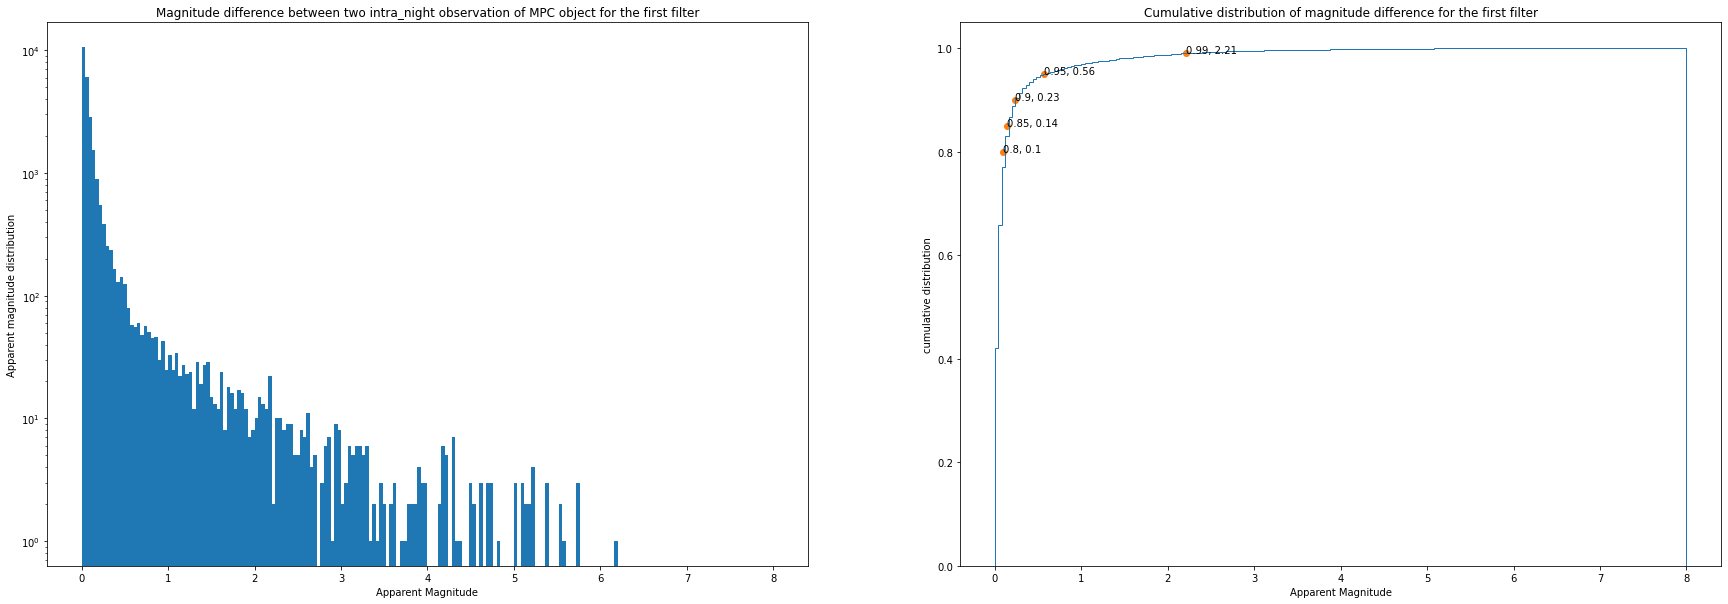

In [ ]:
hist_range = (0, 8)
hist_title = 'Magnitude difference between two intra_night observation of MPC object for the first filter'
hist_xlabel = 'Apparent Magnitude'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (0, 8)
cdf_title = 'Cumulative distribution of magnitude difference for the first filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mag_fid1_value, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

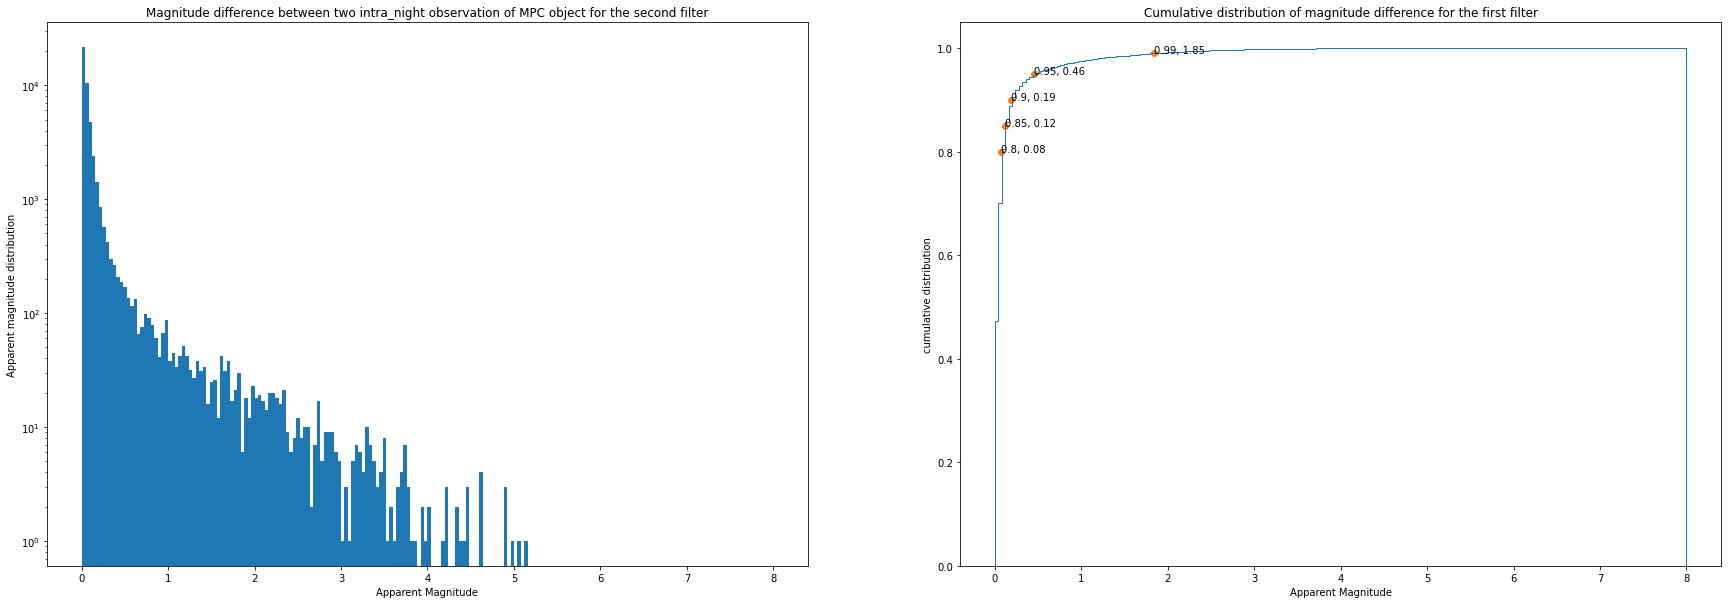

In [ ]:
hist_range = (0, 8)
hist_title = 'Magnitude difference between two intra_night observation of MPC object for the second filter'
hist_xlabel = 'Apparent Magnitude'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (0, 8)
cdf_title = 'Cumulative distribution of magnitude difference for the first filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mag_fid2_value, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

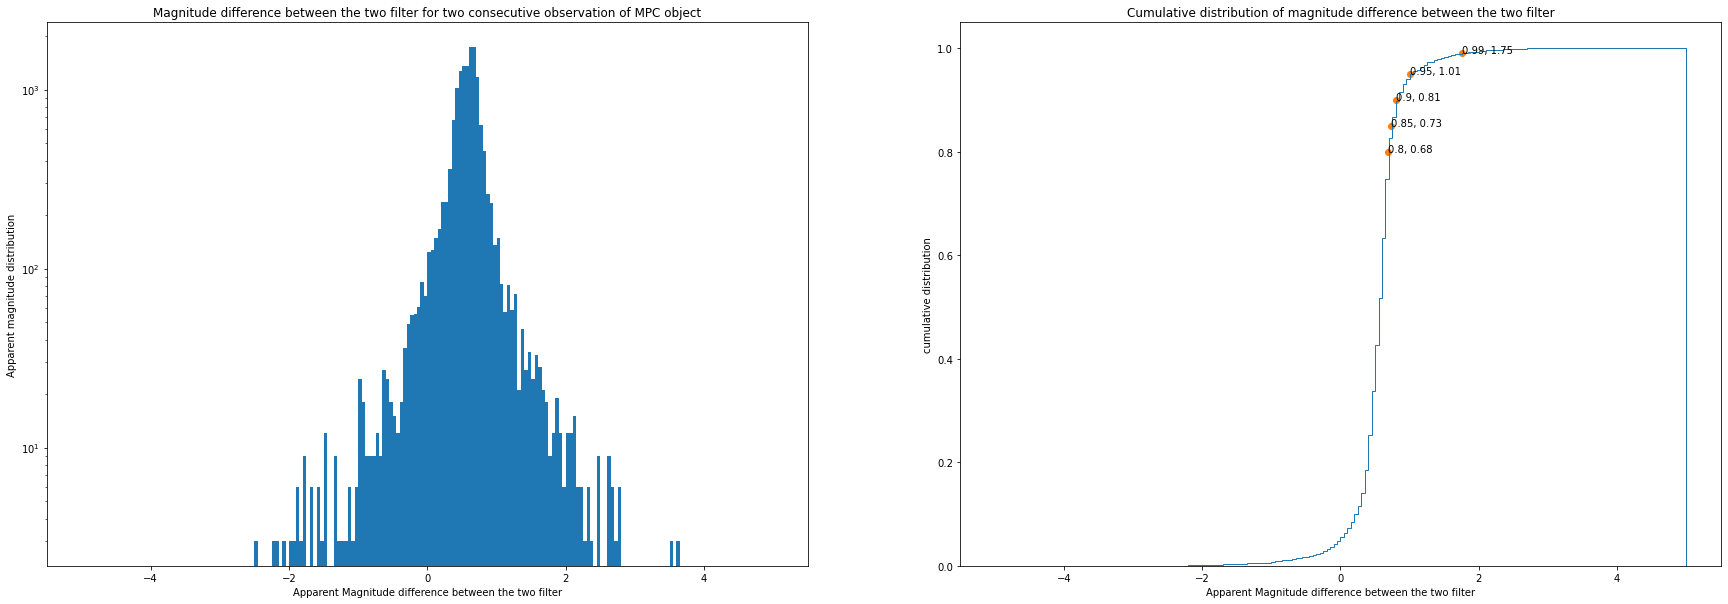

In [ ]:
hist_range = (-5, 5)
hist_title = 'Magnitude difference between the two filter for two consecutive observation of MPC object'
hist_xlabel = 'Apparent Magnitude difference between the two filter'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (-5, 5)
cdf_title = 'Cumulative distribution of magnitude difference between the two filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude difference between the two filter'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

nonzeros_idx = np.where(diff_fid_value != 0)[0]
diff_fid_value = diff_fid_value[nonzeros_idx]

plot_hist_and_cdf(diff_fid_value, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

### MPC Object Number of Point Study

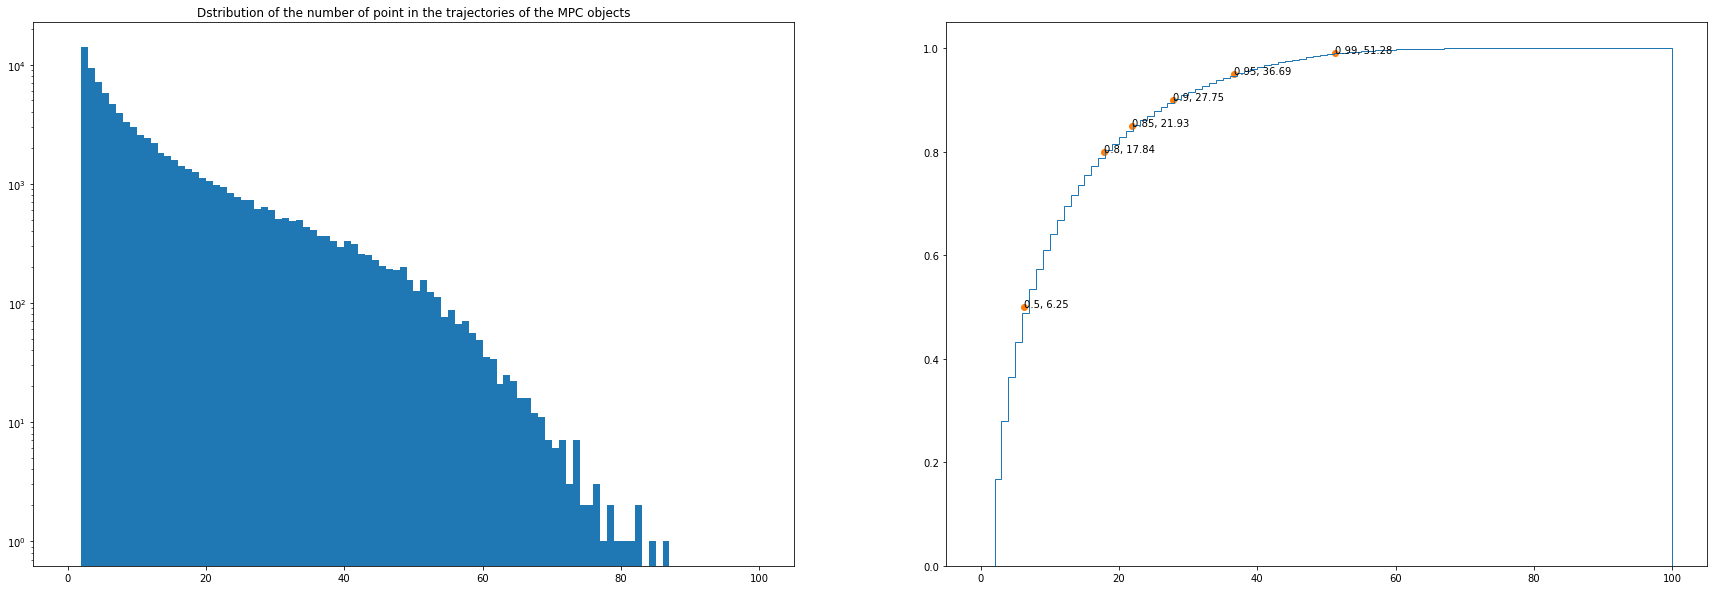

In [ ]:
trajectory_size = mpc_trajectory['trajectory_size']

plot_hist_and_cdf(trajectory_size, (0, 100), 
    'Dstribution of the number of point in the trajectories of the MPC objects', 
    '', '', (0, 100), 
    '', 
    '', '', [0.5, 0.8, 0.85, 0.9, 0.95, 0.99], bins=100)

### SSO Speed study

In [27]:
def residual_linear_fitting(x, nb_points):
    ra = x['ra'][:nb_points]
    dec = x['dec'][:nb_points]

    res = np.polyfit(ra,dec,1, full=True)

    return res[1][0]

In [142]:
nb_points = 10
residue = mpc_trajectory[mpc_trajectory['trajectory_size'] > nb_points].apply(residual_linear_fitting, axis=1, args=[nb_points]).values

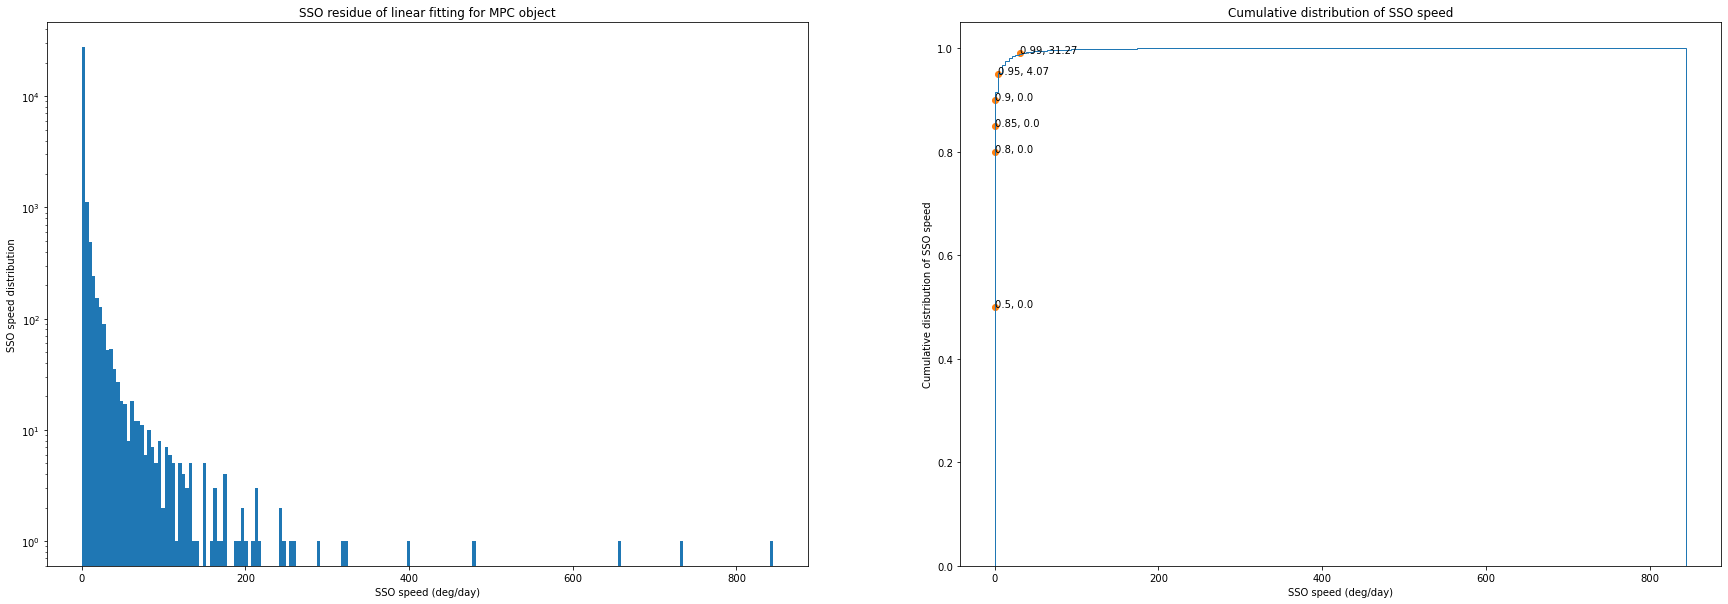

In [146]:
hist_range = (0, max(residue) + 1)
hist_title = 'SSO residue of linear fitting for MPC object'
hist_xlabel = 'SSO speed (deg/day)'
hist_ylabel = 'SSO speed distribution'

cdf_range = (0, max(residue) + 1)
cdf_title = 'Cumulative distribution of SSO speed'
cdf_ylabel = 'Cumulative distribution of SSO speed'
cdf_xlabel = 'SSO speed (deg/day)'

interp_value = [0.5, 0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(residue, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

In [34]:
mpc_trajectory['sep'] = mpc_trajectory.apply(sep_df, axis = 1)

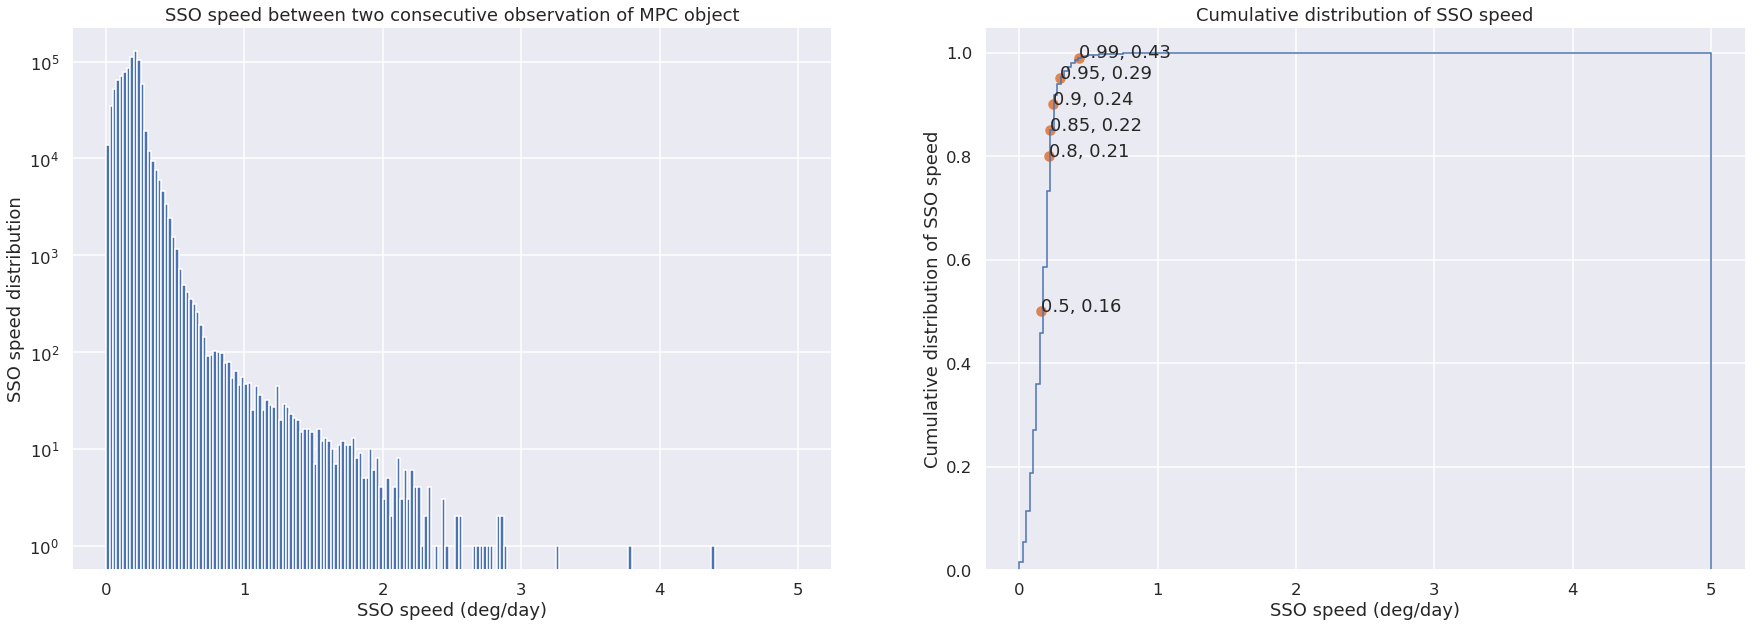

In [35]:
sep_data = mpc_trajectory.explode(['sep'])['sep'].astype(np.float32).values
hist_range = (0, 5)
hist_title = 'SSO speed between two consecutive observation of MPC object'
hist_xlabel = 'SSO speed (deg/day)'
hist_ylabel = 'SSO speed distribution'

cdf_range = (0, 5)
cdf_title = 'Cumulative distribution of SSO speed'
cdf_ylabel = 'Cumulative distribution of SSO speed'
cdf_xlabel = 'SSO speed (deg/day)'

interp_value = [0.5, 0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(sep_data, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

### SSO Acceleration study

In [69]:
def acceleration_df(x):
    velocity = x["sep"]

    jd = x["jd"]
    dd_jd = np.diff(np.diff(jd))

    return np.mean(np.abs(np.divide(np.diff(velocity), dd_jd)))

acc_mpc = mpc_trajectory[mpc_trajectory["trajectory_size"] >= 3]
acc_mpc['acceleration'] = acc_mpc.apply(acceleration_df, axis=1) 

/tmp/ipykernel_3333/4213962427.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs(np.divide(np.diff(velocity), dd_jd)))
/tmp/ipykernel_3333/4213962427.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_mpc['acceleration'] = acc_mpc.apply(acceleration_df, axis=1)


In [65]:
acc = acc_mpc[acc_mpc["acceleration"] != np.inf]["acceleration"]

np.min(acc), np.max(acc), np.mean(acc), np.median(acc), np.quantile(acc, 0.95)

(1.0456619121893558e-06,
 100657272.1593275,
 8363.891250578145,
 0.008697187191754266,
 0.3323186612602043)

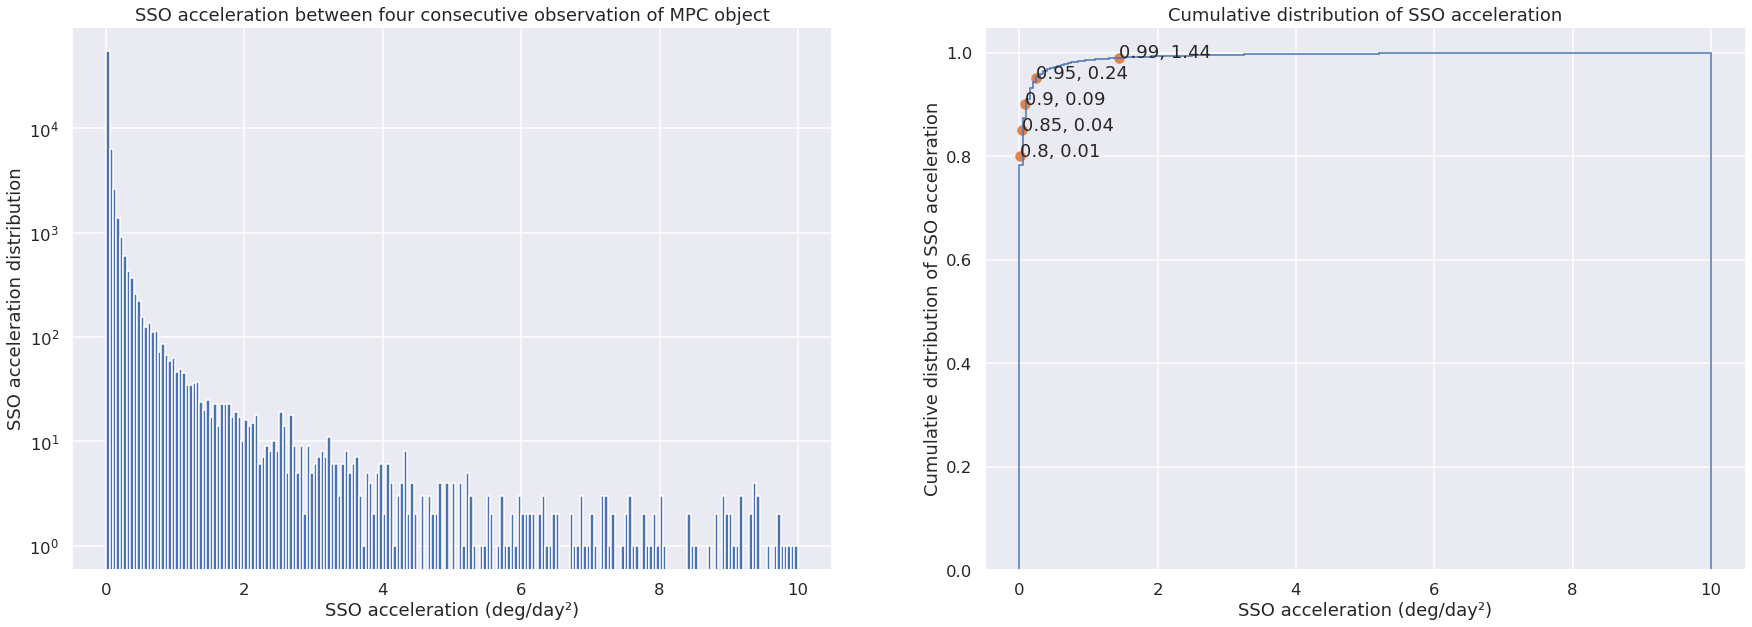

In [47]:
hist_range = (0, 10)
hist_title = 'SSO acceleration between four consecutive observation of MPC object'
hist_xlabel = 'SSO acceleration (deg/day²)'
hist_ylabel = 'SSO acceleration distribution'

cdf_range = (0, 10)
cdf_title = 'Cumulative distribution of SSO acceleration'
cdf_ylabel = 'Cumulative distribution of SSO acceleration'
cdf_xlabel = 'SSO acceleration (deg/day²)'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(acc_mpc["acceleration"], hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

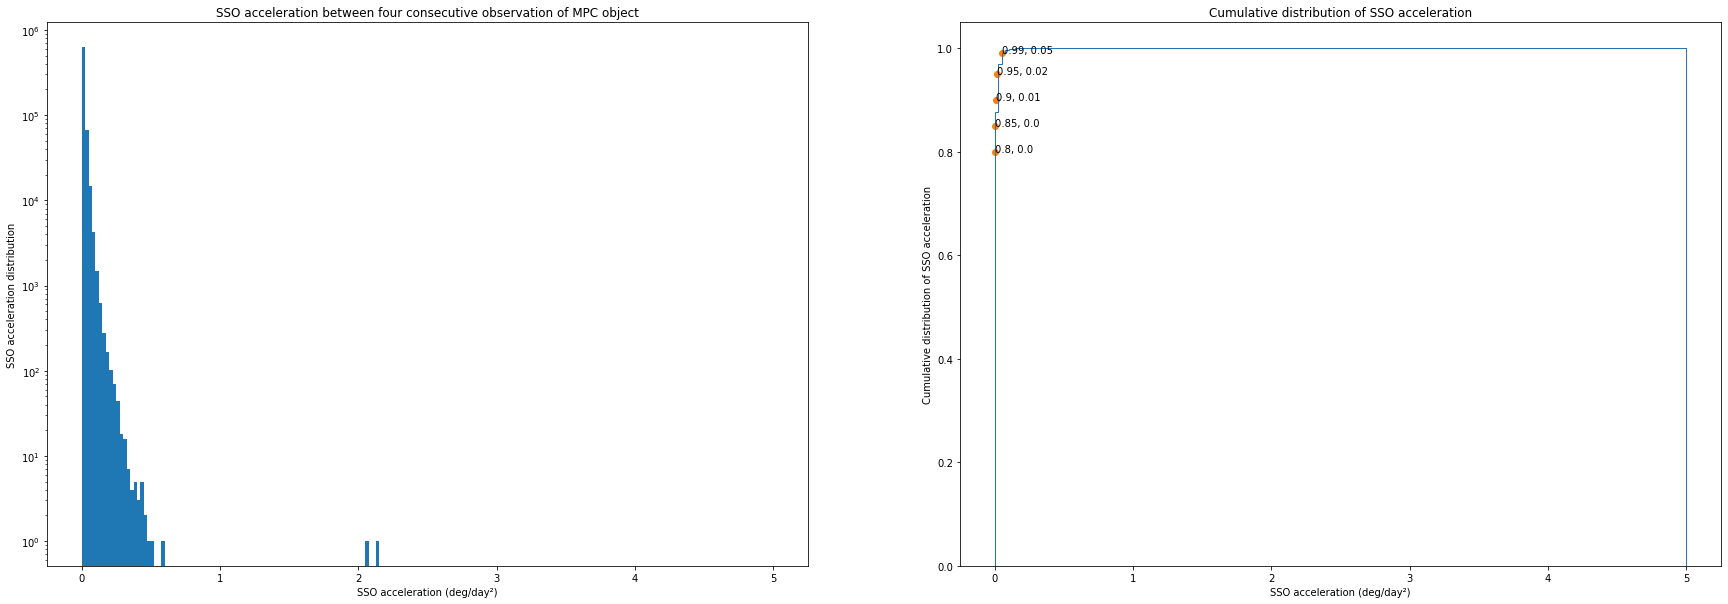

In [100]:
acc_data = mpc_trajectory.explode(['acceleration'])['acceleration'].astype(np.float32).values
hist_range = (0, 5)
hist_title = 'SSO acceleration between four consecutive observation of MPC object'
hist_xlabel = 'SSO acceleration (deg/day²)'
hist_ylabel = 'SSO acceleration distribution'

cdf_range = (0, 5)
cdf_title = 'Cumulative distribution of SSO acceleration'
cdf_ylabel = 'Cumulative distribution of SSO acceleration'
cdf_xlabel = 'SSO acceleration (deg/day²)'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(acc_data, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

In [ ]:
prep_angle = df_sso.drop_duplicates(['ssnamenr', 'nid'])

real_prep_angle = prep_angle[prep_angle['fink_class'] == 'Solar System MPC']\
        .groupby(['ssnamenr'])\
            .agg(
                        ra=('ra',list), 
                        dec=('dec',list), 
                        dcmag=('dcmag',list), 
                        fid=('fid',list),
                        nid=('nid',list),
                        jd=('jd',list),
                        trajectory_size=('candid',lambda x: len(list(x)))
                )

prep_angle_mpc_trajectory = real_trajectory[real_trajectory['trajectory_size'] > 2].sort_values(['trajectory_size'], ascending=False).reset_index()

In [ ]:
prep_angle_mpc_trajectory['pos_angle'] = prep_angle_mpc_trajectory.apply(pos_angle_df, axis = 1)

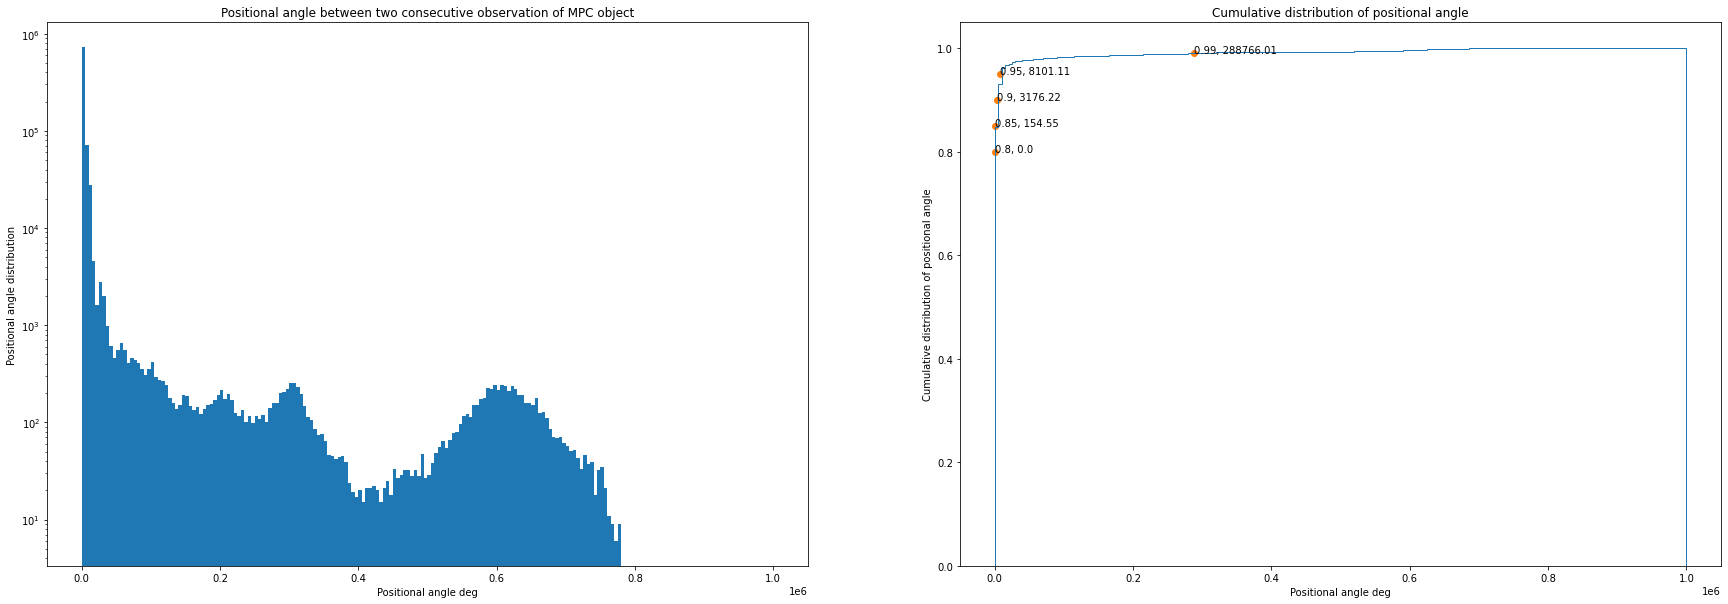

In [ ]:
pos_angle_data = prep_angle_mpc_trajectory.explode(['pos_angle'])['pos_angle'].astype(np.float32).values
hist_range = (0, 1000000)
hist_title = 'Positional angle between two consecutive observation of MPC object'
hist_xlabel = 'Positional angle deg'
hist_ylabel = 'Positional angle distribution'

cdf_range = (0, 1000000)
cdf_title = 'Cumulative distribution of positional angle'
cdf_ylabel = 'Cumulative distribution of positional angle'
cdf_xlabel = 'Positional angle deg'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(pos_angle_data, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

### Magnitude Evolution Study

In [ ]:
mpc_trajectory['diff_mag'] = mpc_trajectory.apply(mag_df, axis=1)

In [ ]:
mag_fid1 = mpc_trajectory.explode(['diff_mag']).reset_index(drop=True)[::3].explode(['diff_mag'])
mag_fid2 = mpc_trajectory.explode(['diff_mag']).reset_index(drop=True)[1::3].explode(['diff_mag'])
diff_fid = mpc_trajectory.explode(['diff_mag']).reset_index(drop=True)[2::3]

In [ ]:
def remove_nan(x):
    return x[~np.isnan(x)]

mag_fid1_value = remove_nan(mag_fid1['diff_mag'].values.astype(np.float32))
mag_fid2_value = remove_nan(mag_fid2['diff_mag'].values.astype(np.float32))
diff_fid_value = remove_nan(diff_fid['diff_mag'].values.astype(np.float32))

In [ ]:
np.max(mag_fid1['diff_mag']), np.min(mag_fid1['diff_mag']), np.max(mag_fid2['diff_mag']), np.min(mag_fid2['diff_mag']), np.max(diff_fid['diff_mag']), np.min(diff_fid['diff_mag'])

(11948.55971098083,
 3.192461930642234e-07,
 11121.072443883704,
 3.885942421062607e-08,
 3.193241626636535,
 -3.729831720072788)

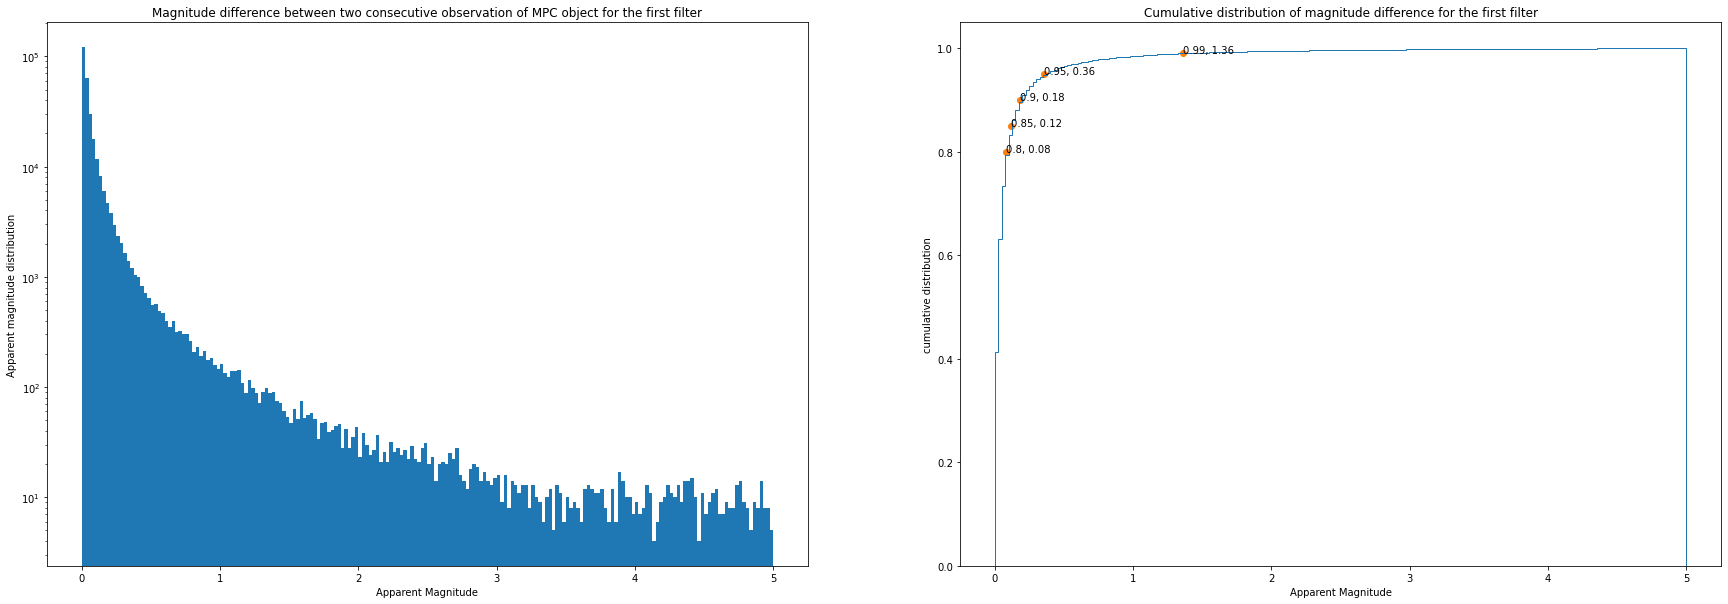

In [ ]:
hist_range = (0, 5)
hist_title = 'Magnitude difference between two consecutive observation of MPC object for the first filter'
hist_xlabel = 'Apparent Magnitude'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (0, 5)
cdf_title = 'Cumulative distribution of magnitude difference for the first filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mag_fid1_value, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

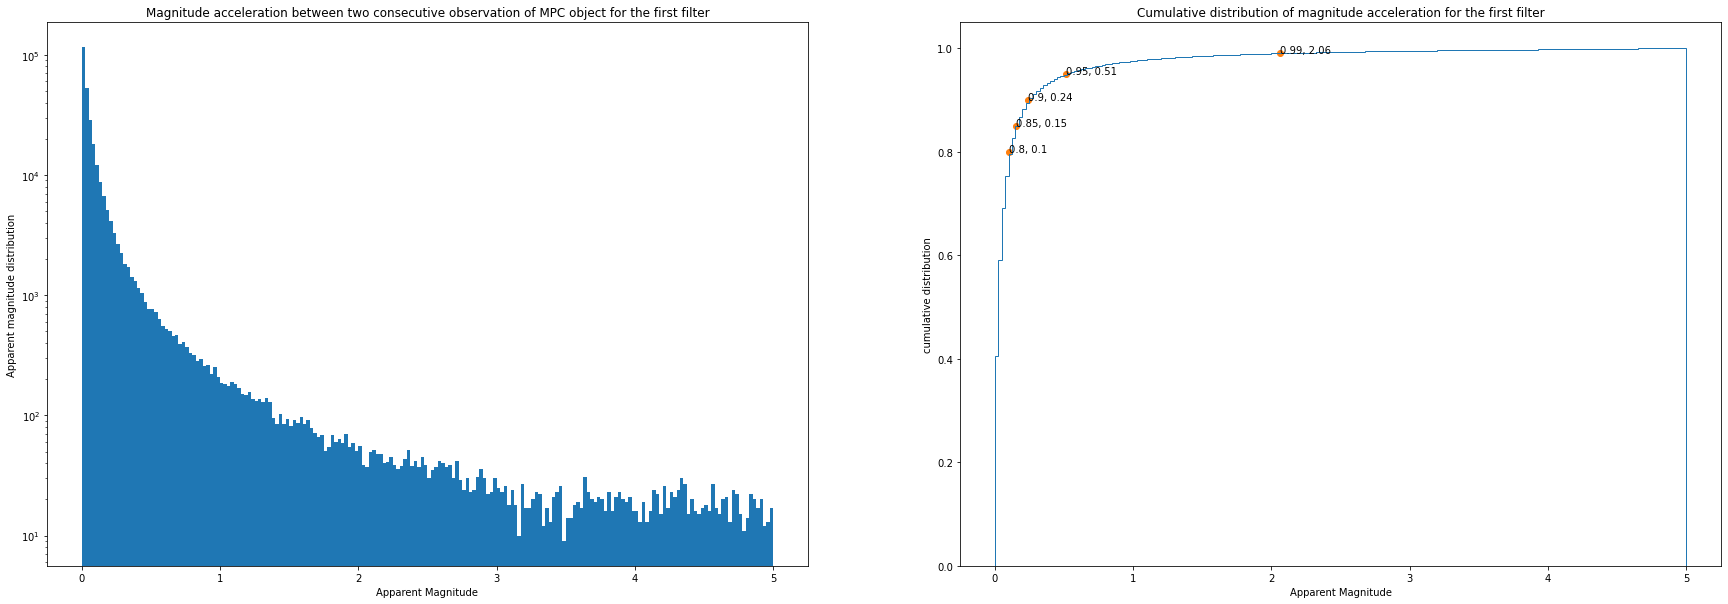

In [ ]:
mag_acceleration_fid1 = np.abs(np.diff(mag_fid1_value))

hist_range = (0, 5)
hist_title = 'Magnitude acceleration between two consecutive observation of MPC object for the first filter'
hist_xlabel = 'Apparent Magnitude'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (0, 5)
cdf_title = 'Cumulative distribution of magnitude acceleration for the first filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mag_acceleration_fid1, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

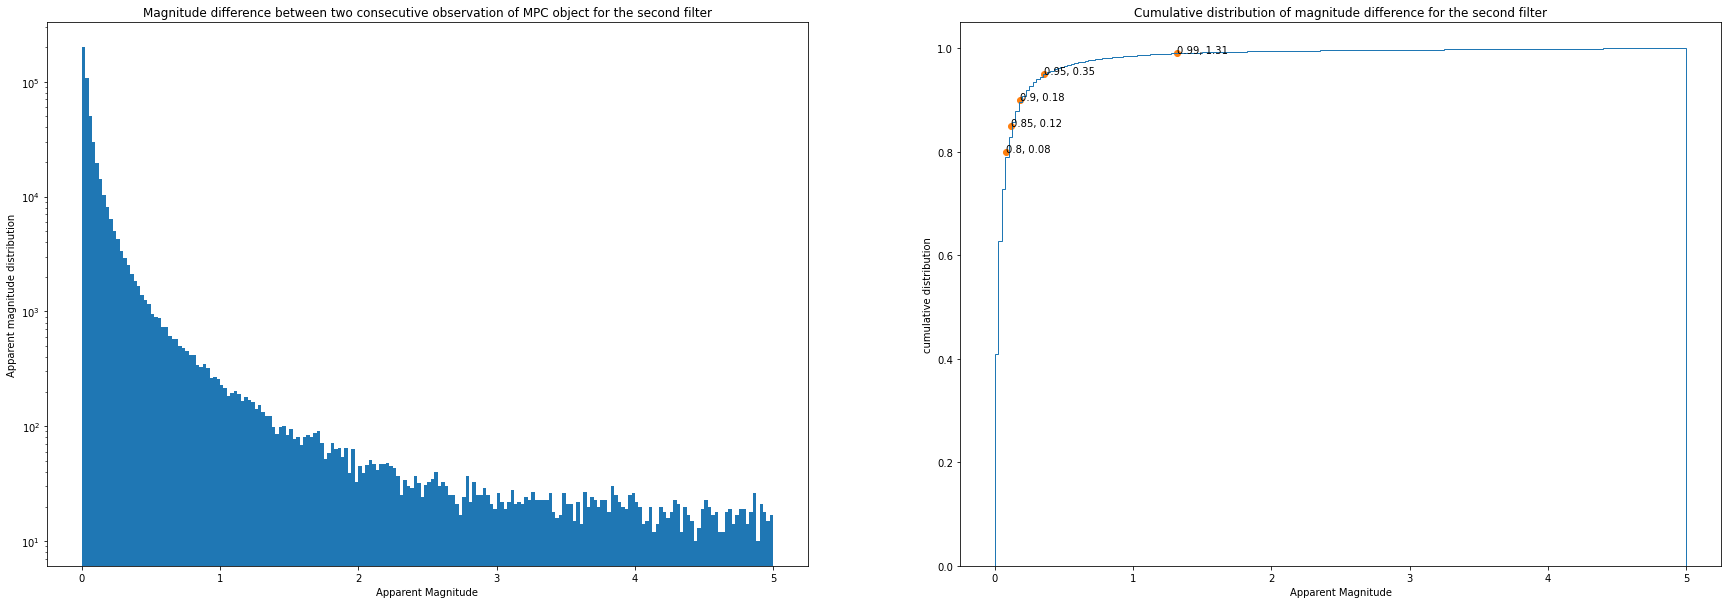

In [ ]:
hist_range = (0, 5)
hist_title = 'Magnitude difference between two consecutive observation of MPC object for the second filter'
hist_xlabel = 'Apparent Magnitude'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (0, 5)
cdf_title = 'Cumulative distribution of magnitude difference for the second filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mag_fid2_value, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

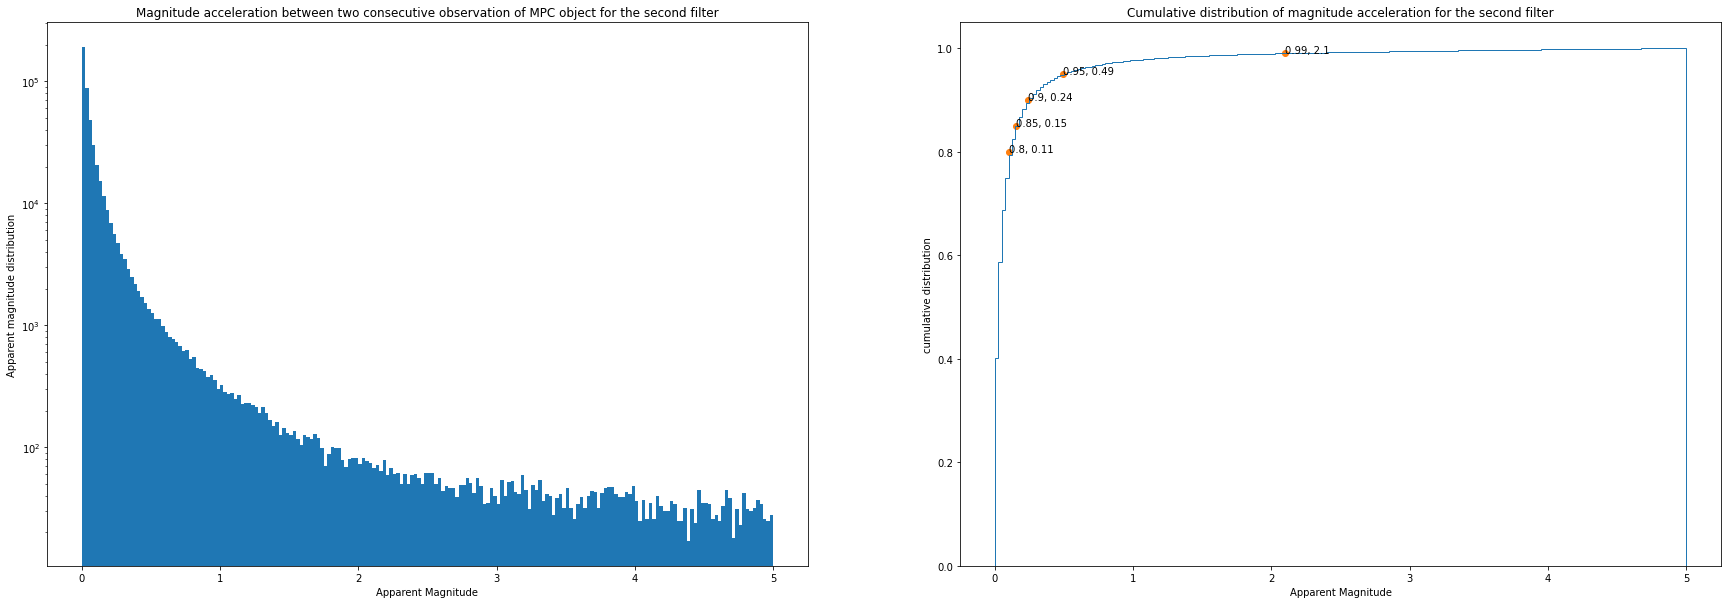

In [ ]:
mag_acceleration_fid2 = np.abs(np.diff(mag_fid2_value))

hist_range = (0, 5)
hist_title = 'Magnitude acceleration between two consecutive observation of MPC object for the second filter'
hist_xlabel = 'Apparent Magnitude'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (0, 5)
cdf_title = 'Cumulative distribution of magnitude acceleration for the second filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mag_acceleration_fid2, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

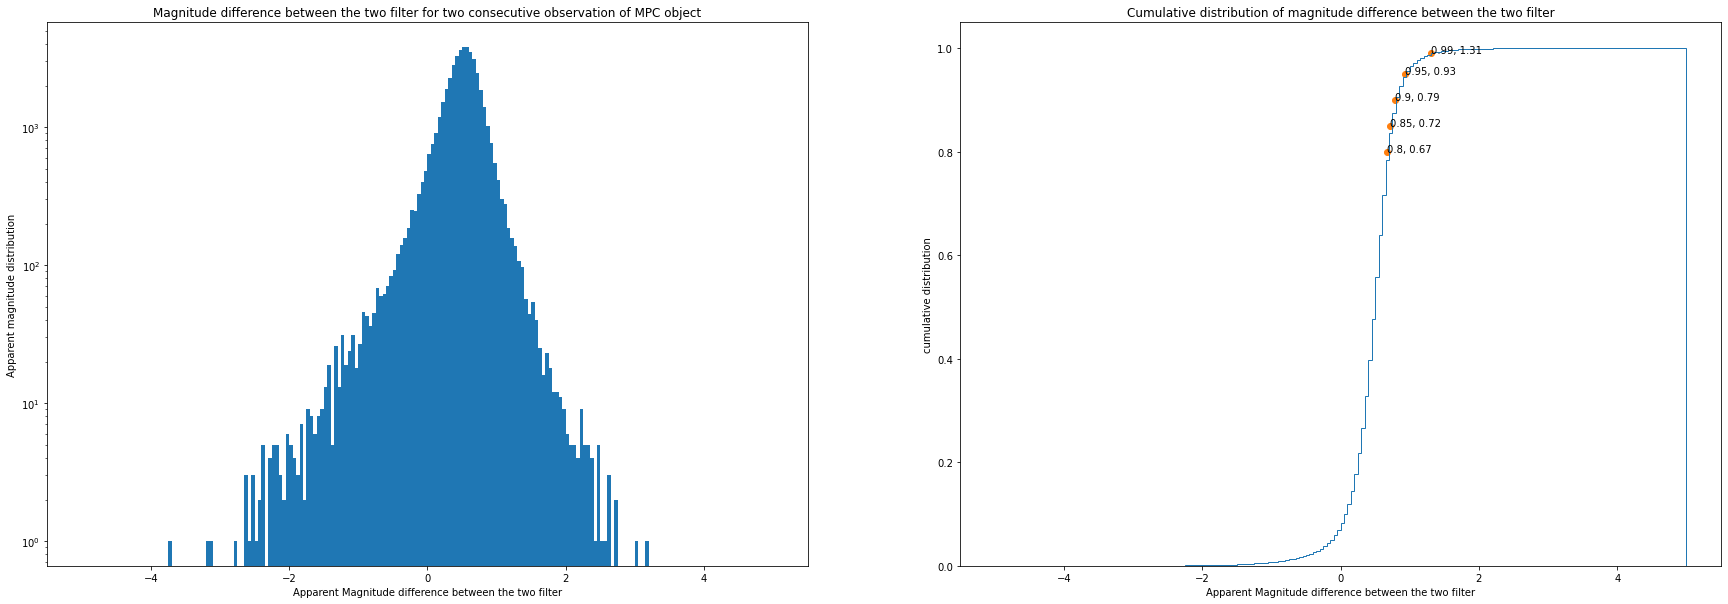

In [ ]:
hist_range = (-5, 5)
hist_title = 'Magnitude difference between the two filter for two consecutive observation of MPC object'
hist_xlabel = 'Apparent Magnitude difference between the two filter'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (-5, 5)
cdf_title = 'Cumulative distribution of magnitude difference between the two filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude difference between the two filter'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(diff_fid_value, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

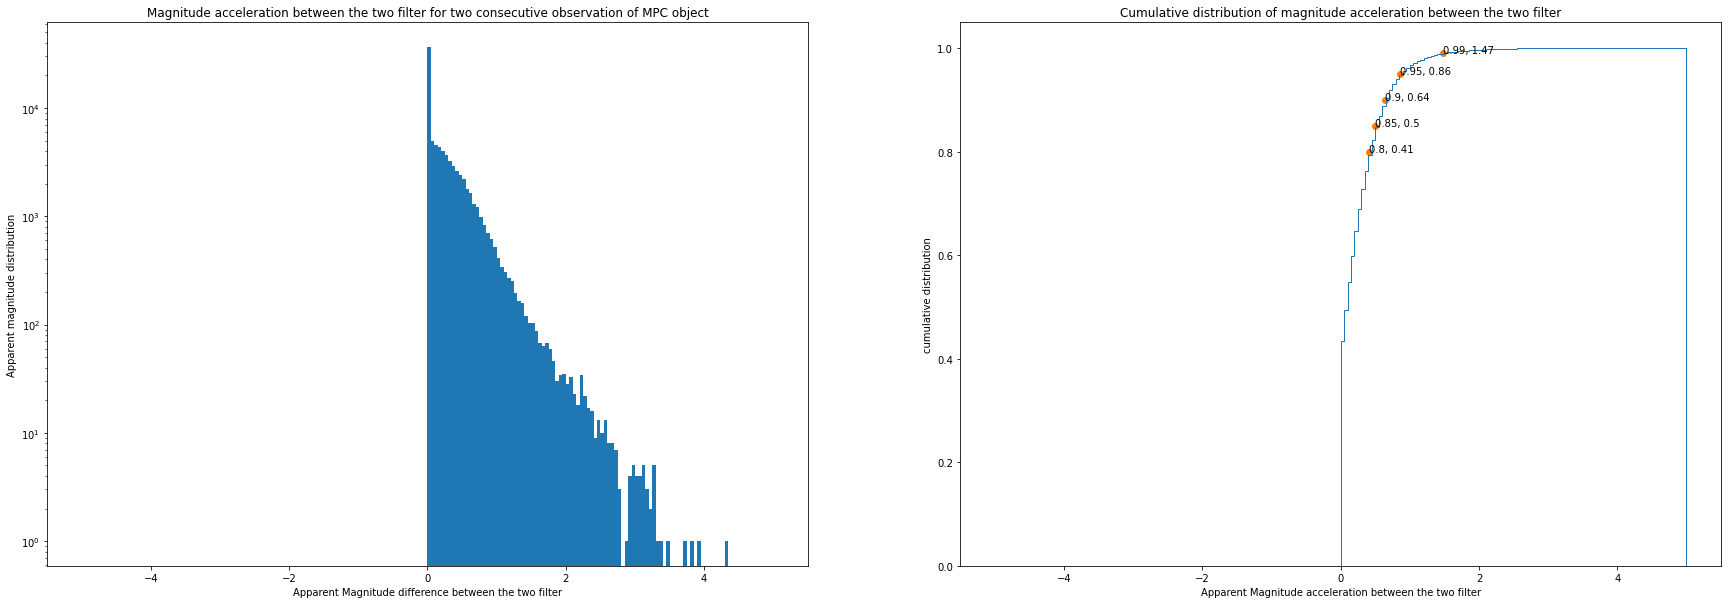

In [ ]:
mag_acceleration_diff_fid = np.diff(diff_fid_value)

hist_range = (-5, 5)
hist_title = 'Magnitude acceleration between the two filter for two consecutive observation of MPC object'
hist_xlabel = 'Apparent Magnitude difference between the two filter'
hist_ylabel = 'Apparent magnitude distribution'

cdf_range = (-5, 5)
cdf_title = 'Cumulative distribution of magnitude acceleration between the two filter'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Apparent Magnitude acceleration between the two filter'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mag_acceleration_diff_fid, hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

### Angle Study between three alerts to perform cone search during night to night association

In [ ]:
def angle(a, b, c):
    ba = b - a
    ca = c - a

    cosine_angle = np.dot(ba, ca) / (np.linalg.norm(ba) * np.linalg.norm(ca))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [ ]:
def angle_df(x):
    ra, dec, jd = x[1], x[2], x[6]

    all_angle = []

    for i in range(len(ra) - 2):
        a = np.array([ra[i], dec[i]])
        b = np.array([ra[i+1], dec[i+1]])
        c = np.array([ra[i+2], dec[i+2]])

        jd1 = jd[i+1]
        jd2 = jd[i+2]
        diff_jd = jd2 - jd1

        if diff_jd > 1:
            all_angle.append(angle(a, b, c) / diff_jd)
        else:
            all_angle.append(angle(a, b, c))
    
    return all_angle

In [ ]:
print(len(df_sso))
prep_angle = df_sso.drop_duplicates(['ssnamenr', 'nid'])
print(len(prep_angle))

real_prep_angle = prep_angle[prep_angle['fink_class'] == 'Solar System MPC']\
        .groupby(['ssnamenr'])\
            .agg(
                        ra=('ra',list), 
                        dec=('dec',list), 
                        dcmag=('dcmag',list), 
                        fid=('fid',list),
                        nid=('nid',list),
                        jd=('jd',list),
                        trajectory_size=('candid',lambda x: len(list(x)))
                )

prep_angle_mpc_trajectory = real_trajectory[real_trajectory['trajectory_size'] > 2].sort_values(['trajectory_size'], ascending=False).reset_index()
prep_angle_mpc_trajectory['angle'] = prep_angle_mpc_trajectory.apply(angle_df, axis = 1)

1001205
758013


In [ ]:
len(prep_angle_mpc_trajectory.explode(['angle'])['angle'])

791693

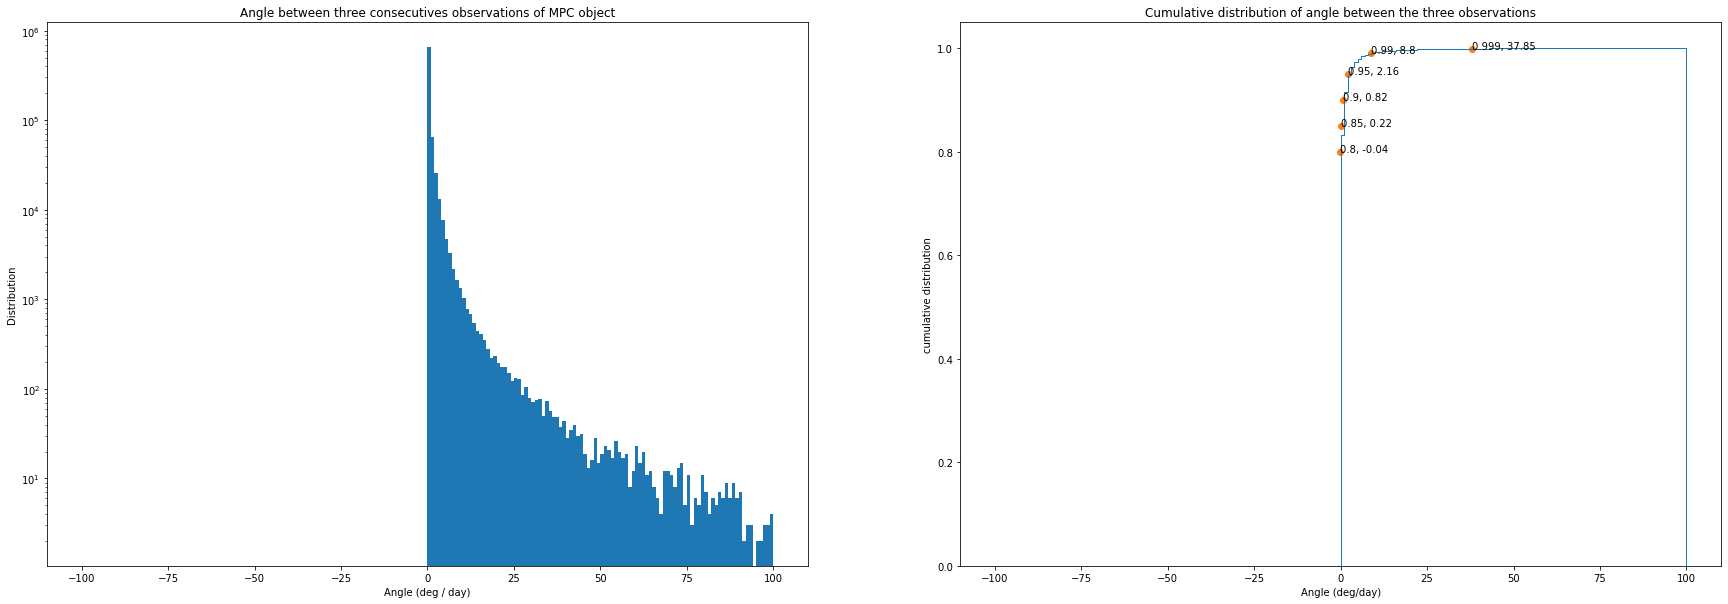

In [ ]:
hist_range = (-100, 100)
hist_title = 'Angle between three consecutives observations of MPC object'
hist_xlabel = 'Angle (deg / day)'
hist_ylabel = 'Distribution'

cdf_range = (-100, 100)
cdf_title = 'Cumulative distribution of angle between the three observations'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Angle (deg/day)'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99, 0.999]

plot_hist_and_cdf(prep_angle_mpc_trajectory.explode(['angle'])['angle'].astype(np.float64), hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

In [ ]:
mpc_trajectory['angle'] = mpc_trajectory.apply(angle_df, axis = 1)

/tmp/ipykernel_14662/1575037255.py:6: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cosine_angle)


In [ ]:
len(mpc_trajectory.explode(['angle'])['angle'])

805776

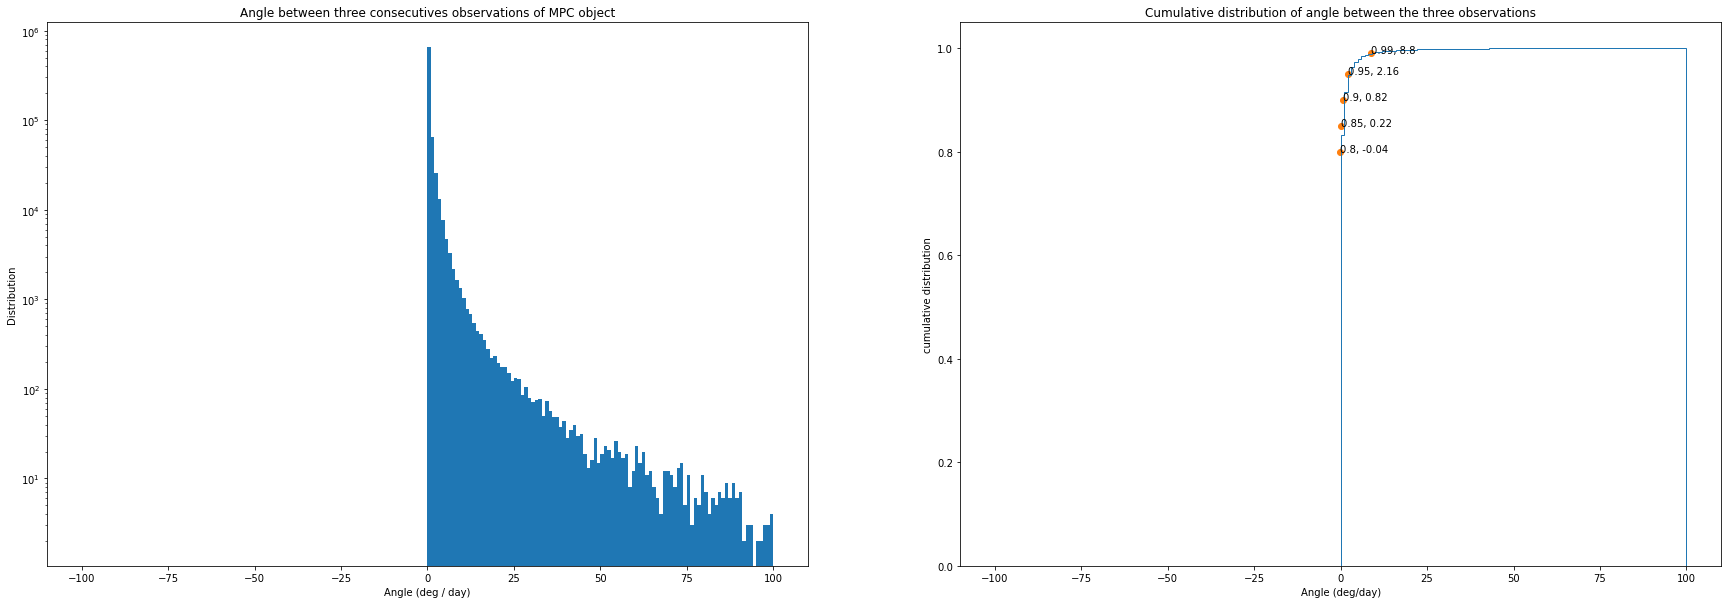

In [ ]:
hist_range = (-100, 100)
hist_title = 'Angle between three consecutives observations of MPC object'
hist_xlabel = 'Angle (deg / day)'
hist_ylabel = 'Distribution'

cdf_range = (-100, 100)
cdf_title = 'Cumulative distribution of angle between the three observations'
cdf_ylabel = 'cumulative distribution'
cdf_xlabel = 'Angle (deg/day)'

interp_value = [0.8, 0.85, 0.9, 0.95, 0.99]

plot_hist_and_cdf(mpc_trajectory.explode(['angle'])['angle'].astype(np.float64), hist_range, hist_title, hist_xlabel, hist_ylabel, cdf_range, cdf_title, cdf_xlabel, cdf_ylabel, percent_cdf=interp_value)

### Mean speed study of the MPC object

Just to see what it look like

In [ ]:
def mean_speed(x):

    speed = x[8]
    if len(speed) > 0:
        return np.mean(speed)
    else:
        return 0

mpc_trajectory['mean_speed'] = mpc_trajectory.apply(mean_speed, axis = 1)

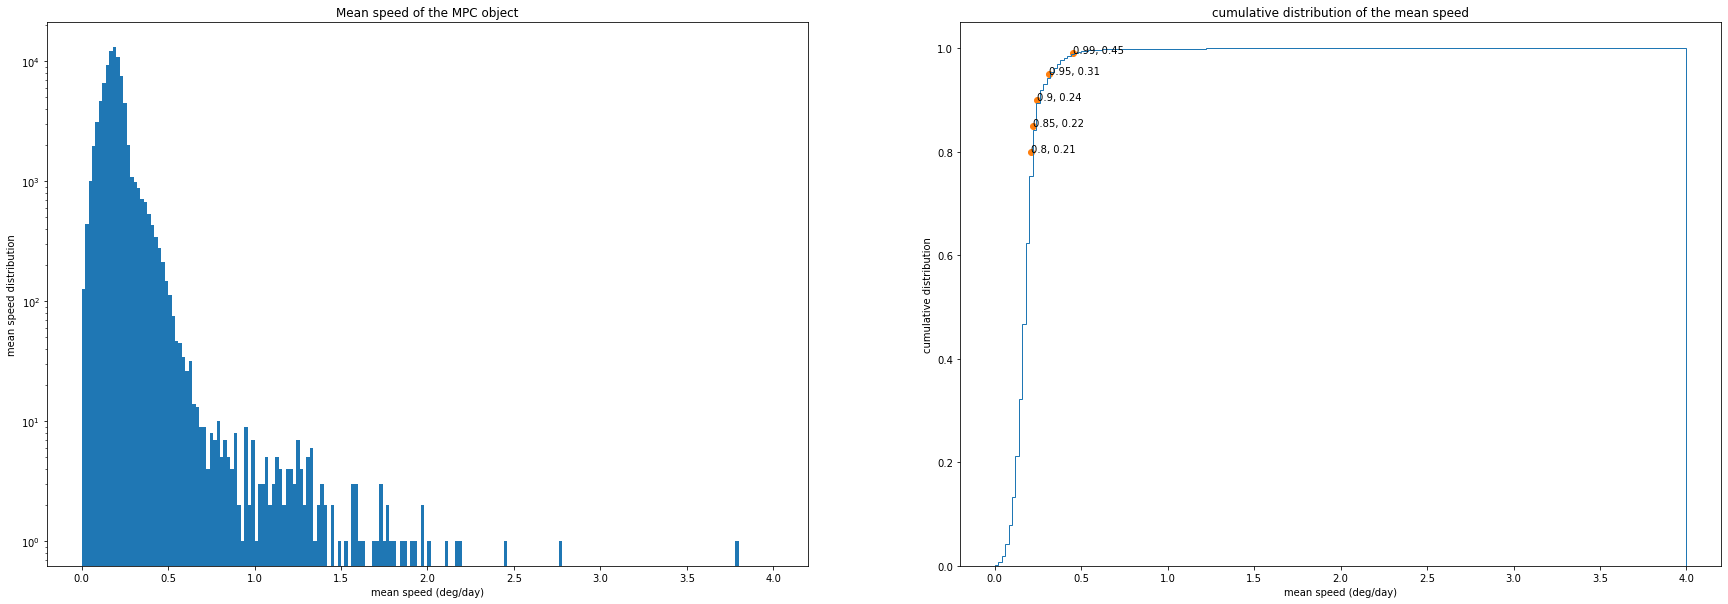

In [ ]:
plot_hist_and_cdf(
    mpc_trajectory['mean_speed'],
    (0, 4),
    'Mean speed of the MPC object',
    'mean speed (deg/day)',
    'mean speed distribution',
    (0, 4),
    'cumulative distribution of the mean speed',
    'mean speed (deg/day)',
    'cumulative distribution',
    [0.8, 0.85, 0.9, 0.95, 0.99]
)

## Cross match with the MPC Database 

We will now load the MPC Database which provide more information about each MPC object especially the orbital parameters

In [47]:
mpc_trajectory['ssnamenr'] = mpc_trajectory['ssnamenr'].astype("string")


mpc_database = pd.read_json('../data/mpc_database/mpcorb_extended.json')
mpc_database['Number'] = mpc_database['Number'].astype("string").str[1:-1]

orbit_param = mpc_trajectory.merge(mpc_database, how='inner', left_on='ssnamenr', right_on='Number')
orbit_param

,ssnamenr,ra,dec,dcmag,fid,nid,jd,trajectory_size,H,G,...,Aphelion_dist,Semilatus_rectum,Synodic_period,Orbit_type,NEO_flag,One_km_NEO_flag,PHA_flag,Critical_list_numbered_object_flag,Arc_length,One_opposition_object_flag
0,1951,"[216.9545533, 218.0165354, 219.0169028, 219.08...","[55.4971483, 56.9767415, 58.3546605, 58.452669...","[15.180907911927733, 15.124579374273916, 16.17...","[2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, ...","[1520, 1522, 1524, 1524, 1527, 1536, 1536, 153...","[2459274.934456, 2459276.9081944, 2459278.8294...",86,14.15,0.15,...,1.476093,0.692584,2.563544,Object with perihelion distance < 1.665 AU,NaN,NaN,NaN,NaN,NaN,NaN
1,53317,"[196.8659234, 196.7152213, 196.4730042, 192.67...","[56.0866378, 56.2220868, 56.4178826, 57.887489...","[16.929014310829764, 17.208366361167876, 16.83...","[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, ...","[1520, 1521, 1522, 1536, 1536, 1538, 1541, 154...","[2459274.9054398, 2459275.7023611, 2459276.888...",84,13.39,0.15,...,3.260657,1.306090,1.286917,MBA,NaN,NaN,NaN,NaN,NaN,NaN
2,7019,"[186.1766519, 185.6609425, 185.6401671, 185.08...","[19.096891, 19.5983566, 19.6160314, 20.0824944...","[16.194570346647293, 16.18130877240066, 15.718...","[2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, ...","[1521, 1524, 1524, 1527, 1537, 1537, 1539, 153...","[2459275.8837616, 2459278.8181134, 2459278.923...",82,13.61,0.15,...,2.736214,1.152651,1.379570,MBA,NaN,NaN,NaN,NaN,NaN,NaN
3,1584,"[18.9326971, 18.9336873, 18.9347218, 18.935773...","[28.8384758, 28.8390451, 28.8395781, 28.840117...","[16.346376510354464, 16.406203228034187, 16.39...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1602, 1602, 1602, 1602, 1603, 1603, 1603, 160...","[2459356.9798727, 2459356.9822222, 2459356.984...",82,10.94,0.15,...,2.839697,1.142510,1.375707,Phocaea,NaN,NaN,NaN,NaN,NaN,NaN
4,75539,"[170.4953886, 169.7151066, 169.6880301, 168.18...","[59.4883409, 59.3031794, 59.2966307, 58.780127...","[17.0905532571915, 17.09427192658038, 16.45380...","[1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, ...","[1520, 1522, 1522, 1526, 1526, 1536, 1536, 153...","[2459274.7167593, 2459276.7378935, 2459276.803...",81,14.69,0.15,...,2.896673,1.062062,1.406818,MBA,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82222,241065,"[204.9800888, 203.5045597]","[-1.9450489, -0.9446841]","[19.587736480639723, 20.41534775375981]","[2, 1]","[1553, 1562]","[2459307.9502315, 2459316.8471065]",2,15.23,0.15,...,3.429523,1.581706,1.213783,MBA,NaN,NaN,NaN,NaN,NaN,NaN
82223,241055,"[213.5875791, 212.1232237]","[-11.4385191, -10.8640964]","[20.02774797417329, 18.285904331252176]","[2, 2]","[1562, 1570]","[2459316.8075347, 2459324.7702546]",2,16.28,0.15,...,3.515074,1.542975,1.220044,MBA,NaN,NaN,NaN,NaN,NaN,NaN
82224,241042,"[245.9497381, 245.5183188]","[-17.1824969, -17.1331042]","[19.840213767086198, 19.261483813553173]","[1, 2]","[1614, 1616]","[2459368.8368056, 2459370.8536458]",2,16.20,0.15,...,3.620491,1.445165,1.236427,MBA,NaN,NaN,NaN,NaN,NaN,NaN
82225,240943,"[171.9070052, 171.4413013]","[8.9548205, 9.1591715]","[19.93517751338254, 19.77736044723792]","[2, 2]","[1536, 1538]","[2459290.8410301, 2459292.8378356]",2,16.82,0.15,...,2.869170,1.184252,1.354840,MBA,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
orbit_param.columns

Index(['ssnamenr', 'ra', 'dec', 'dcmag', 'fid', 'nid', 'jd', 'trajectory_size',
       'H', 'G', 'Num_obs', 'rms', 'U', 'Arc_years', 'Perturbers',
       'Perturbers_2', 'Number', 'Name', 'Principal_desig', 'Other_desigs',
       'Epoch', 'M', 'Peri', 'Node', 'i', 'e', 'n', 'a', 'Ref', 'Num_opps',
       'Computer', 'Hex_flags', 'Last_obs', 'Tp', 'Orbital_period',
       'Perihelion_dist', 'Aphelion_dist', 'Semilatus_rectum',
       'Synodic_period', 'Orbit_type', 'NEO_flag', 'One_km_NEO_flag',
       'PHA_flag', 'Critical_list_numbered_object_flag', 'Arc_length',
       'One_opposition_object_flag'],
      dtype='object')

In [49]:
specific_orbit = orbit_param[orbit_param['ssnamenr'] == "19285"].explode(['ra', 'dec', 'dcmag', 'fid', 'nid', 'jd'])

In [50]:
from astropy.time import Time
today = Time(specific_orbit['jd'].values.astype(np.float64), format="jd")
specific_orbit['real date'] = today.iso

In [51]:
coord = SkyCoord(specific_orbit['ra'], specific_orbit['dec'], unit=u.degree)
coord.dec.hms.h

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
coord.dec.hms.m

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0., 59., 59.,
       59., 59., 59., 59., 58., 58., 58., 58., 58., 57., 57., 56., 56.,
       53., 53., 52., 52., 51., 50.])

In [53]:
coord.dec.hms.s

array([32.883432, 32.960496, 34.138944, 34.138776, 34.14072 , 34.14336 ,
       33.708648, 33.699216, 33.095472, 33.011664, 15.631632, 15.558672,
       12.218208,  8.577216,  8.574792,  8.429136,  4.759704,  4.477416,
        0.510264,  0.506616,  0.480984,  0.486264, 50.949096,  9.886296,
       48.209472, 47.60316 , 32.255424, 31.927344, 15.393432, 15.165504,
       56.686176, 38.31948 , 37.955112, 18.048216, 17.610384, 44.996496,
       22.285752, 58.852896, 58.399296, 58.410816, 58.145016, 54.288912,
       20.527608, 12.233952, 36.7038  ])

In [54]:
specific_orbit[['ra', 'dec', 'jd', 'nid', 'real date']]

,ra,dec,jd,nid,real date
2025,142.107087,15.387014,2459275.685671,1521,2021-03-02 04:27:22.000
2025,142.090225,15.387335,2459275.775428,1521,2021-03-02 06:36:36.996
2025,141.563601,15.392246,2459278.737477,1524,2021-03-05 05:41:58.004
2025,141.560775,15.392245,2459278.753322,1524,2021-03-05 06:04:47.004
2025,141.556526,15.392253,2459278.777245,1524,2021-03-05 06:39:14.003
2025,141.556446,15.392264,2459278.77772,1524,2021-03-05 06:39:54.999
2025,141.225886,15.390453,2459280.733009,1526,2021-03-07 05:35:32.004
2025,141.22235,15.390413,2459280.753762,1526,2021-03-07 06:05:25.002
2025,141.059457,15.387898,2459281.750058,1527,2021-03-08 06:00:05.003
2025,141.0453,15.387549,2459281.835266,1527,2021-03-08 08:02:47.000


In [55]:
orbital_elem = ["ssnamenr", "a", "e", "i", "Node", "Peri", "M", "U"]
specific_orbit[orbital_elem]

,ssnamenr,a,e,i,Node,Peri,M,U
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0
2025,19285,3.399597,0.056773,14.35443,326.97244,291.71371,304.11914,0


We want now to know the orbit type according to the separation speed in the Sky

In [39]:
without_tracklets = df_sso[df_sso["fink_class"] == "Solar System MPC"].drop_duplicates(["ssnamenr", "nid"]).groupby(["ssnamenr"]).agg(
                        ra=('ra',list), 
                        dec=('dec',list), 
                        dcmag=('dcmag',list), 
                        fid=('fid',list),
                        jd=('jd',list),
                        trajectory_size=('candid',lambda x: len(list(x)))
                ).sort_values(["trajectory_size"])

without_tracklets = without_tracklets[without_tracklets["trajectory_size"] >= 2]

In [40]:
without_tracklets["sep"] = without_tracklets.apply(sep_df, axis=1)

In [41]:
without_tracklets["mean_sep"] = without_tracklets.apply(lambda x: np.mean(x["sep"]), axis=1)

In [56]:
# Samples of separation speed
sep_limit = np.around(np.arange(0, 5, 0.2), 2)
print(sep_limit)

orbit_sep_explode = orbit_param.explode(['sep'])

square_size = np.sqrt(len(sep_limit)).astype(np.int32)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


KeyError: 'sep'

In [60]:
orbit_color = [
    "gold",
    "red",
    "dodgerblue",
    "limegreen",
    "grey",
    "magenta",
    "chocolate",
    "blue",
    "orange",
    "mediumspringgreen",
    "deeppink"
]

dict_color_orbit = {orbit_type:orbit_color for orbit_type, orbit_color in zip(np.unique(orbit_param['Orbit_type']), orbit_color)}

itemgetter("Aten", "Amor")(dict_color_orbit)

('dodgerblue', 'gold')

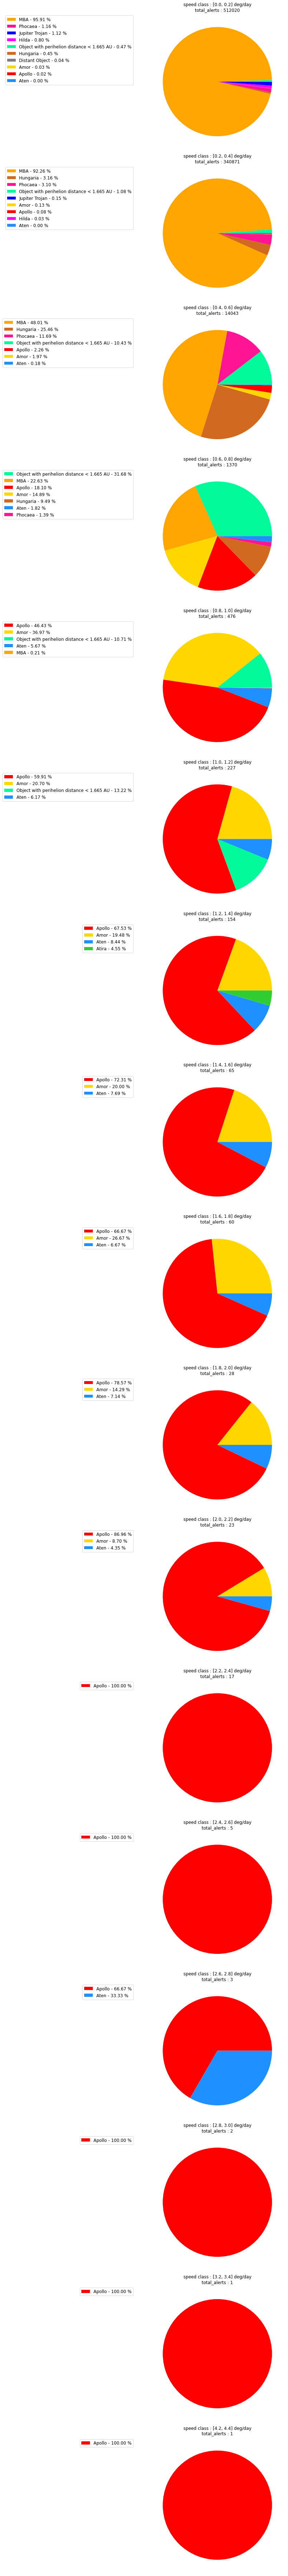

In [44]:
all_counter = list()

all_sep_limit = list()

for i in range(len(sep_limit)-1):
    
    sep_limit_df = orbit_sep_explode[(orbit_sep_explode['sep'] > sep_limit[i]) & (orbit_sep_explode['sep'] < sep_limit[i + 1])]
    
    orbit_counter = Counter(sep_limit_df['Orbit_type'])
    if len(orbit_counter) > 0:
        all_counter.append(orbit_counter)
        all_sep_limit.append((i, i + 1))

fig, axs = plt.subplots(len(all_counter), 1, figsize=(30, 100))
fig.patch.set_facecolor('xkcd:white')


for orbit_counter, sep_idx, ax in zip(all_counter, all_sep_limit, axs):
    
    orbit = list(orbit_counter.keys())
    nb_orbit = list(orbit_counter.values())

    percent = 100 * (nb_orbit/np.sum(nb_orbit))


    ax.set_title("speed class : [{}, {}] deg/day\ntotal_alerts : {}".format(sep_limit[sep_idx[0]], sep_limit[sep_idx[1]], np.sum(nb_orbit)))

    current_orbit_color = itemgetter(*orbit)(dict_color_orbit)

    patches, texts = ax.pie(nb_orbit, colors=list(current_orbit_color))

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(orbit, percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, nb_orbit),
                                            key=lambda x: x[2],
                                            reverse=True))

    ax.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=12)

plt.tight_layout()
plt.show()

We can see that all orbit type are present in the lowest separation speed. However, the higher the speed, the less there are orbit type.

The highest speeds are represented by the Apollo Orbit type which represents a group of Near crossing Earth asteroids, [(Apollo Asteroid)](https://en.wikipedia.org/wiki/Apollo_asteroid). They are presents in the low speed class and in the high speed class. This can be explained by their high excentricity. They have a large major axis greater than the Earth but a small perihelion smaller than the Earth. 

[Amor Asteroid](https://en.wikipedia.org/wiki/Amor_asteroid) are another type of near Earth asteroids.

[Aten Asteroids](https://en.wikipedia.org/wiki/Aten_asteroid) are crossing asteroids group so when they pass close to the Earth, they have a high separation speed. 

The object with the lowest speed are mostly object from the Main Belt of asteroids between Mars and Jupyter. There are also Jupyter Trojan which are asteroids orbitting with Jupyter.

Near Earth Asteroid in the lowest speed class can be object with an high excentricity. 

[Hilda](https://en.wikipedia.org/wiki/Hilda_asteroid), [Hungarian](https://en.wikipedia.org/wiki/Hungaria_asteroids) and [Phocaea](https://en.wikipedia.org/wiki/Phocaea_family) are asteroid group of the Main Belt.


Atira object are asteroid orbiting exclusively within the Earth orbit. In the current asteroid alert dataset over the month of March/April/May and June, there are only one object with this type of orbit.

In [61]:
low_speed_mpc = orbit_sep_explode[(orbit_sep_explode['sep'] > 0) & (orbit_sep_explode['sep'] < 0.2)]

NameError: name 'orbit_sep_explode' is not defined

In [62]:
apollo_excentricity = low_speed_mpc[low_speed_mpc['Orbit_type'] == 'Apollo']['e']

print(np.min(apollo_excentricity), np.max(apollo_excentricity), np.mean(apollo_excentricity))

NameError: name 'low_speed_mpc' is not defined

### Study of Orbital Parameters

In [63]:
orbit_type_label = list(orbit_param['Orbit_type'].values.astype(str))

Text(0.5, 1.0, 'Asteroid group defined by the semi-major axis according to their eccentricity')

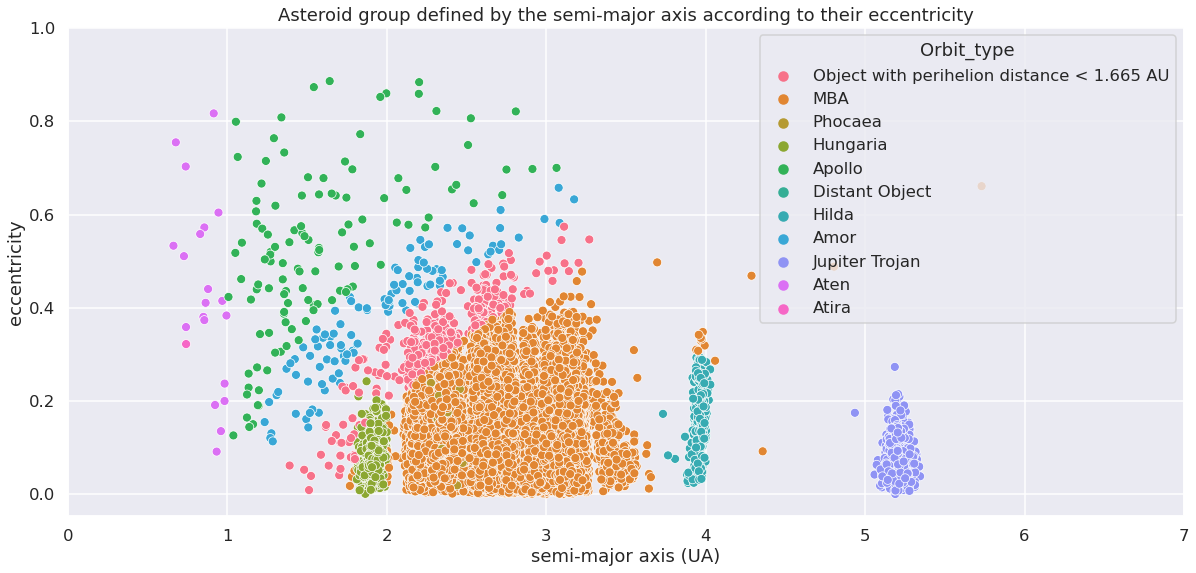

In [72]:
g = sns.scatterplot(data=orbit_param, x='a', y='e', hue='Orbit_type')

g.set(xlim=(0, 7))
g.set(xlabel='semi-major axis (UA)', ylabel='eccentricity')
g.set_title('Asteroid group defined by the semi-major axis according to their eccentricity')

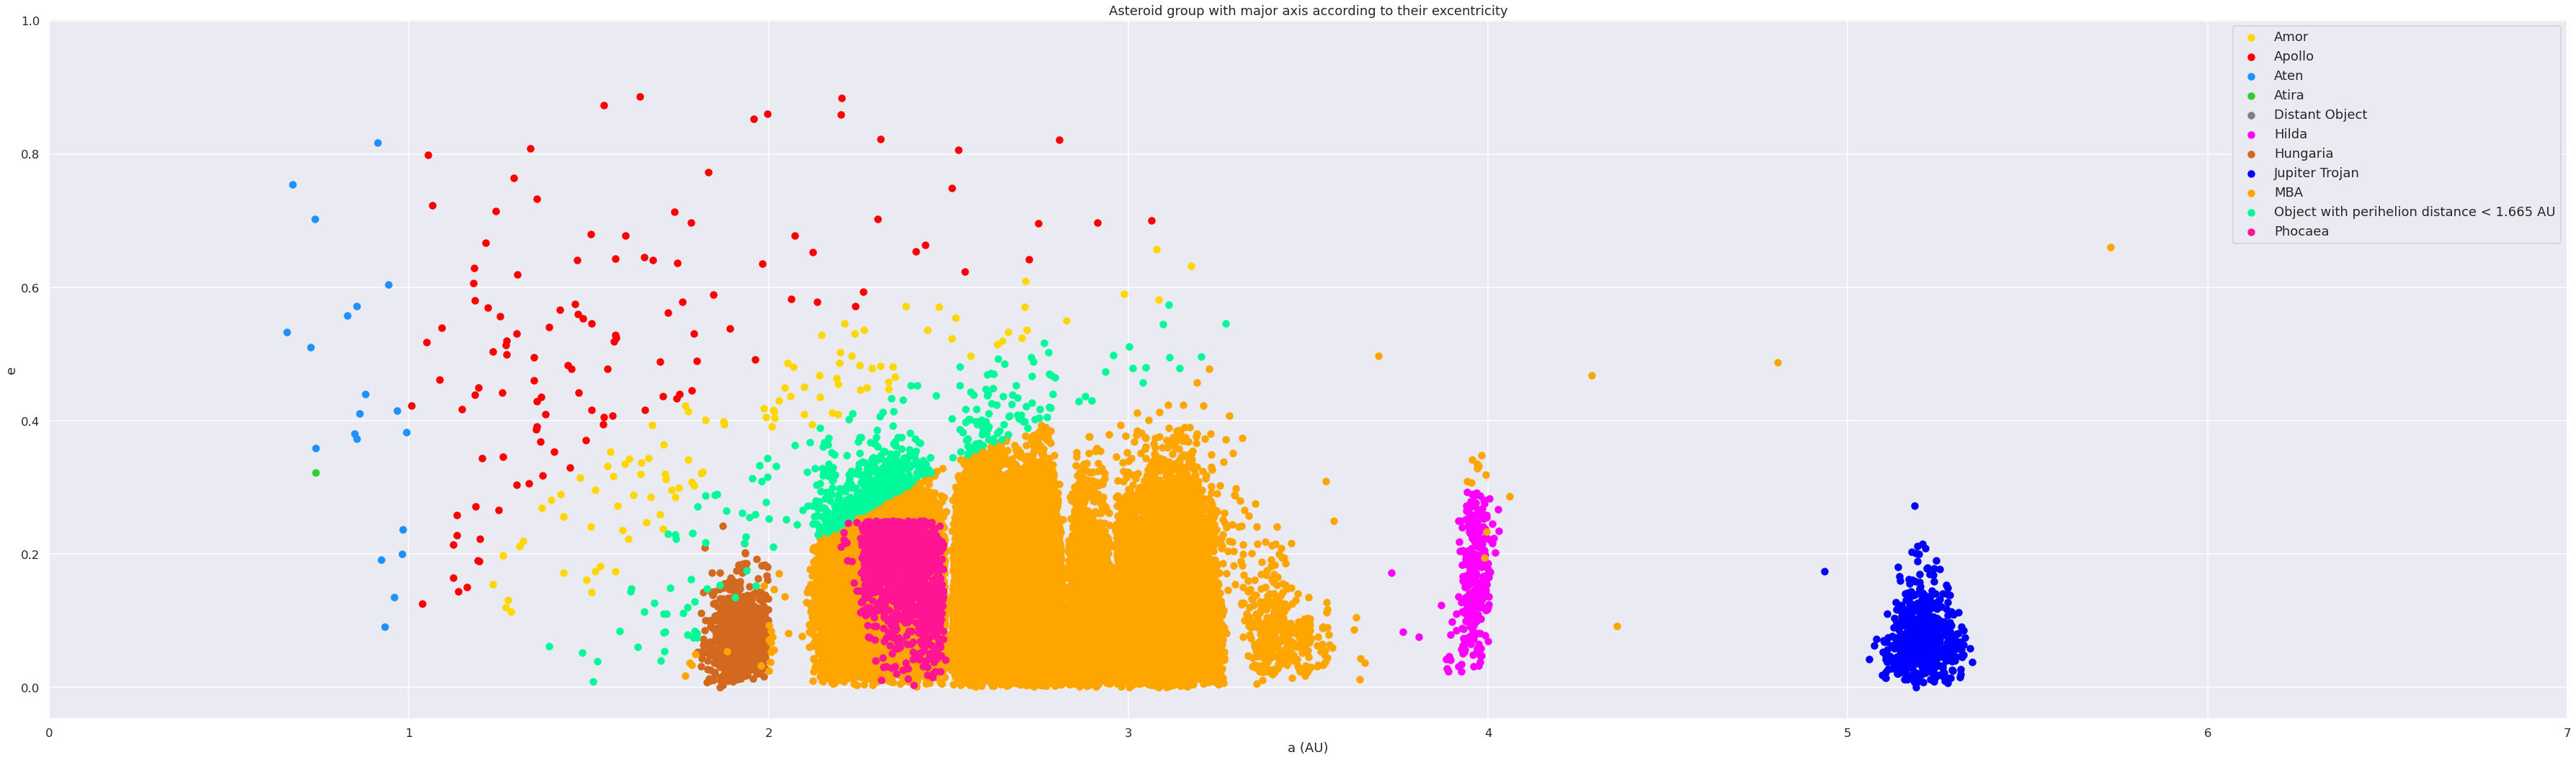

In [65]:
fig, ax1 = plt.subplots(1, 1, figsize=(50, 15))

for orbit_type in np.unique(orbit_type_label):
    specific_orbit_alert = orbit_param[orbit_param['Orbit_type'] == orbit_type]
    ax1.scatter(specific_orbit_alert['a'], specific_orbit_alert['e'], label=orbit_type, c=dict_color_orbit[orbit_type])
    # ax2.scatter(specific_orbit_alert['a'], specific_orbit_alert['e'], label=orbit_type, c=dict_color_orbit[orbit_type])

    # ax3.scatter(specific_orbit_alert['a'], specific_orbit_alert['i'], label=orbit_type, c=dict_color_orbit[orbit_type])
    # ax4.scatter(specific_orbit_alert['a'], specific_orbit_alert['i'], label=orbit_type, c=dict_color_orbit[orbit_type])

ax1.set_xlim((0, 7))
ax1.set_title('Asteroid group with major axis according to their excentricity')
ax1.set_xlabel('a (AU)')
ax1.set_ylabel('e')

# ax2.set_xlim((7, 250))
# ax2.set_title('Asteroid group with major axis according to their inclinaison')
# ax2.set_xlabel('a (AU)')
# ax2.set_ylabel('e')

# ax3.set_xlim((0, 7))
# ax3.set_title('Distant Asteroid group with major axis according to their excentricity')
# ax3.set_xlabel('a (AU)')
# ax3.set_ylabel('i')

# ax4.set_xlim((7, 250))
# ax4.set_title('Distant Asteroid group with major axis according to their inclinaison')
# ax4.set_xlabel('a (AU)')
# ax4.set_ylabel('i')

plt.tight_layout()
plt.legend(loc="best", prop={'size': 18})
plt.show()


## Trying to clusters the lightcurves of the MPC asteroids

We will try to clusters the lightcurves of the asteroids in order to group the asteroids according to some properties like surface composition, surface brightness or some magnitude periodicity. We want to add a new familly of tags as for the orbit but for the lightcurves. 

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from tslearn.barycenters import dtw_barycenter_averaging

In [ ]:
def generate_lc_batch(normalize=True):
    for lc_size in np.unique(orbit_param['trajectory_size']):
        current_lc_size = orbit_param[orbit_param['trajectory_size'] == lc_size]

        all_same_size_lc = []

        for _, rows in current_lc_size.iterrows():
            dcmag = rows['dcmag']
            fid = rows['fid']
            jd = rows['jd']

            lightcurves_feature = np.c_[dcmag, fid, jd]
            if normalize:
                scaler = MinMaxScaler()
                lightcurves_feature = scaler.fit_transform(lightcurves_feature)
                
            all_same_size_lc.append(lightcurves_feature)
        
        yield np.array(all_same_size_lc)

### First Try : LSTM


We will use LSTM Neural Network to aggregate/generate feature from the lightcurves and also as a dimentionality reductor. 

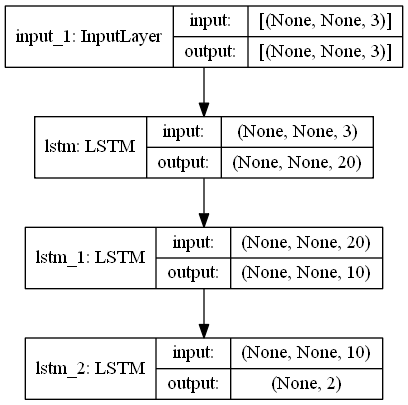

In [ ]:
inputs = Input((None, 3))

lstm_layer = LSTM(20, return_sequences=True)(inputs)
lstm_layer = LSTM(10, return_sequences=True)(lstm_layer)
lstm_layer = LSTM(2)(lstm_layer)

lightcurves_feature_extractor = Model(inputs, lstm_layer)

plot_model(lightcurves_feature_extractor, show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
lc_batch = generate_lc_batch()

In [ ]:
all_predict_feature = []
for lightcurves in lc_batch:
    all_predict_feature.append(lightcurves_feature_extractor(lightcurves).numpy())

In [ ]:
all_predict_feature = np.concatenate(all_predict_feature)

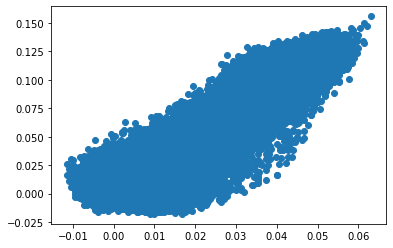

In [ ]:
plt.scatter(all_predict_feature[:, 0], all_predict_feature[:, 1])

### Second Try : Self Organizing Map

In [ ]:
def generate_lc_batch(lc_size, normalize=True, scaler=MinMaxScaler()):
        current_lc_size = orbit_param[orbit_param['trajectory_size'] >= lc_size]

        all_same_size_lc = []
        all_same_size_ssnamenr = []
        all_same_size_orbit_type = []

        for _, rows in current_lc_size.iterrows():
            dcmag = rows['dcmag'][:lc_size]
            ssnamenr = rows['ssnamenr'][:lc_size]
            orbit_type = rows['Orbit_type'][:lc_size]

            if normalize:
                scaler = RobustScaler()
                dcmag = scaler.fit_transform(np.array(dcmag).reshape(-1, 1))
                
            all_same_size_lc.append(dcmag)
            all_same_size_orbit_type.append(orbit_type)
            all_same_size_ssnamenr.append(ssnamenr)
        
        return np.array(all_same_size_lc), np.array(all_same_size_ssnamenr), np.array(all_same_size_orbit_type)

In [ ]:
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].scatter(np.arange(len(series)), series,c="gray",alpha=0.5)

                time_series_medoid = dtw_barycenter_averaging(np.vstack(win_map[cluster]))
                axs[cluster].scatter(np.arange(len(time_series_medoid)), time_series_medoid,c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [ ]:
lc, ssnamenr, orbit_type = generate_lc_batch(40)
lc = lc.reshape(lc.shape[0], lc.shape[1])

print(lc.shape)

som_x = som_y = 3

print(som_x, som_y)

(3479, 40)
3 3


In [ ]:
som = MiniSom(som_x, som_y, lc.shape[1], sigma=0.3, learning_rate=0.5)

In [ ]:
som.random_weights_init(lc)

In [ ]:
som.train(lc, 200)

In [ ]:
win_map = som.win_map(lc)

We can observe a good lightcurves clustering from 30 points

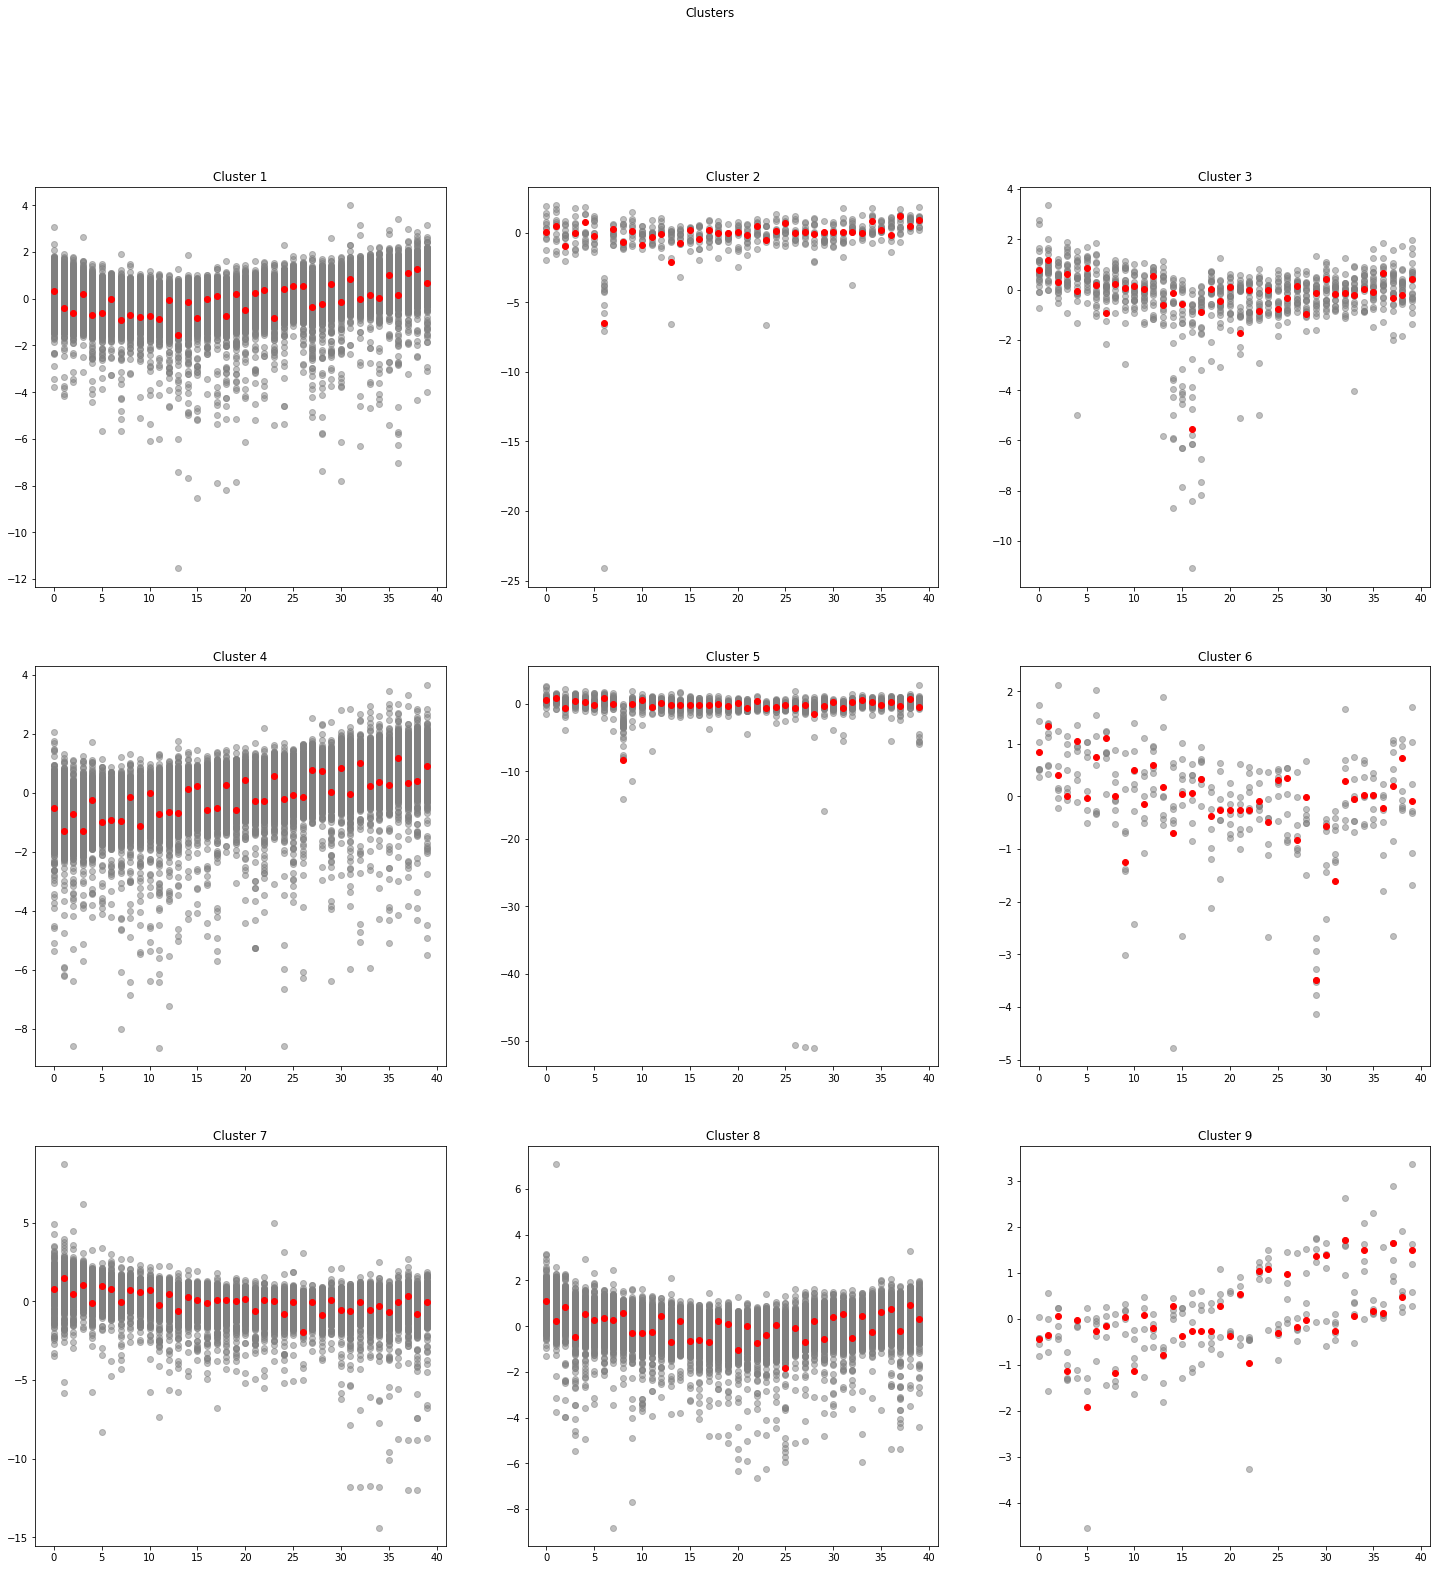

In [ ]:
plot_som_series_averaged_center(som_x, som_y, win_map)

In [ ]:
cluster_map = []
for idx in range(len(lc)):
    winner_node = som.winner(lc[idx])
    cluster_map.append((ssnamenr[idx], orbit_type[idx], winner_node[0]*som_y+winner_node[1]+1))

clustering_result = pd.DataFrame(cluster_map,columns=["ssnamenr", "orbit_type", "Cluster"]).sort_values(by="Cluster")

In [ ]:
cluster_groupby = clustering_result.groupby(['Cluster']).agg(
                        nb_mpc_object=('ssnamenr',lambda x: len(np.unique(list(x)))), 
                        orbit_type=('orbit_type',lambda x: np.unique(list(x)))
                ).reset_index()
cluster_groupby

,Cluster,nb_mpc_object,orbit_type
0,1,938,"[Amor, Distant Object, Hilda, Hungaria, Jupite..."
1,2,12,"[MBA, Phocaea]"
2,3,22,"[Hilda, MBA, Object with perihelion distance <..."
3,4,1382,"[Amor, Apollo, Hilda, Hungaria, MBA, Object wi..."
4,5,34,"[Apollo, Hilda, Hungaria, Jupiter Trojan, MBA,..."
5,6,7,"[Hungaria, Jupiter Trojan, MBA]"
6,7,690,"[Amor, Apollo, Hilda, Hungaria, Jupiter Trojan..."
7,8,389,"[Apollo, Distant Object, Hilda, Hungaria, Jupi..."
8,9,5,"[Hilda, MBA]"


In [ ]:
cluster_groupby[cluster_groupby['Cluster'] == 3]

,Cluster,nb_mpc_object,orbit_type
2,3,22,"[Hilda, MBA, Object with perihelion distance <..."
